In [1]:
import os
import sys
import glob
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st
import scipy

import peakutils

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Import functions from peak_functions

repository_path = os.path.abspath('..')
sys.path.append(repository_path)

import peak_functions as pf
import fit_functions  as fitf

In [4]:
plt.rcParams["figure.figsize"] = 9, 6
plt.rcParams["font.size"]      = 14

In [17]:
evts_path = '/Users/romoluque_c/LEGEND/BACON/data_npz/'

all_channels = 9

peak_height_all_channels_dict  = {}
peak_area_all_channels_dict    = {}
peak_area_zs_all_channels_dict = {}

def get_date(filename):
    date_str = filename[46:56]
    date = datetime.strptime(date_str, '%m_%d_%Y')
    return date

files        = [file for file in os.listdir(evts_path) if file.startswith('BACoN_sig_processing')]
sorted_files = sorted(files, key=get_date)

for filename in sorted_files:
    my_file = evts_path+filename
    d = np.load(my_file, allow_pickle=True)
    
    date = filename[46:56]
    
    if date not in peak_height_all_channels_dict:
        peak_height_all_channels  = [[] for i in range(all_channels)]
        peak_area_all_channels    = [[] for i in range(all_channels)]
        peak_area_zs_all_channels = [[] for i in range(all_channels)]

    for channel in range(all_channels):
        try:
            if channel==3:
                continue
    
            for val in d['peak_height_all_channels'] [channel][0]:
                peak_height_all_channels [channel].append(val)
            for val in d['peak_area_all_channels']   [channel][0]:
                peak_area_all_channels   [channel].append(val)
            for val in d['peak_area_zs_all_channels'][channel][0]:
                peak_area_zs_all_channels[channel].append(val)

        except IndexError:
            print(filename)
            continue

    peak_height_all_channels_dict [filename[46:56]] = np.array(peak_height_all_channels , dtype=object)
    peak_area_all_channels_dict   [filename[46:56]] = np.array(peak_area_all_channels   , dtype=object)
    peak_area_zs_all_channels_dict[filename[46:56]] = np.array(peak_area_zs_all_channels, dtype=object)

BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_13.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_12.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_10.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_11.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_29.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_15.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_14.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_28.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_16.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_17.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_7.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_6.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_8.npz
BACoN_sig_processing_peak_height_and_area_run-07_06_2023-file_9.npz
BACoN_sig_processing_peak_height_and_a

### Height of the peak:


                      ---------------------------------------
                      ----- No XENON (low light levels) -----
                      ---------------------------------------



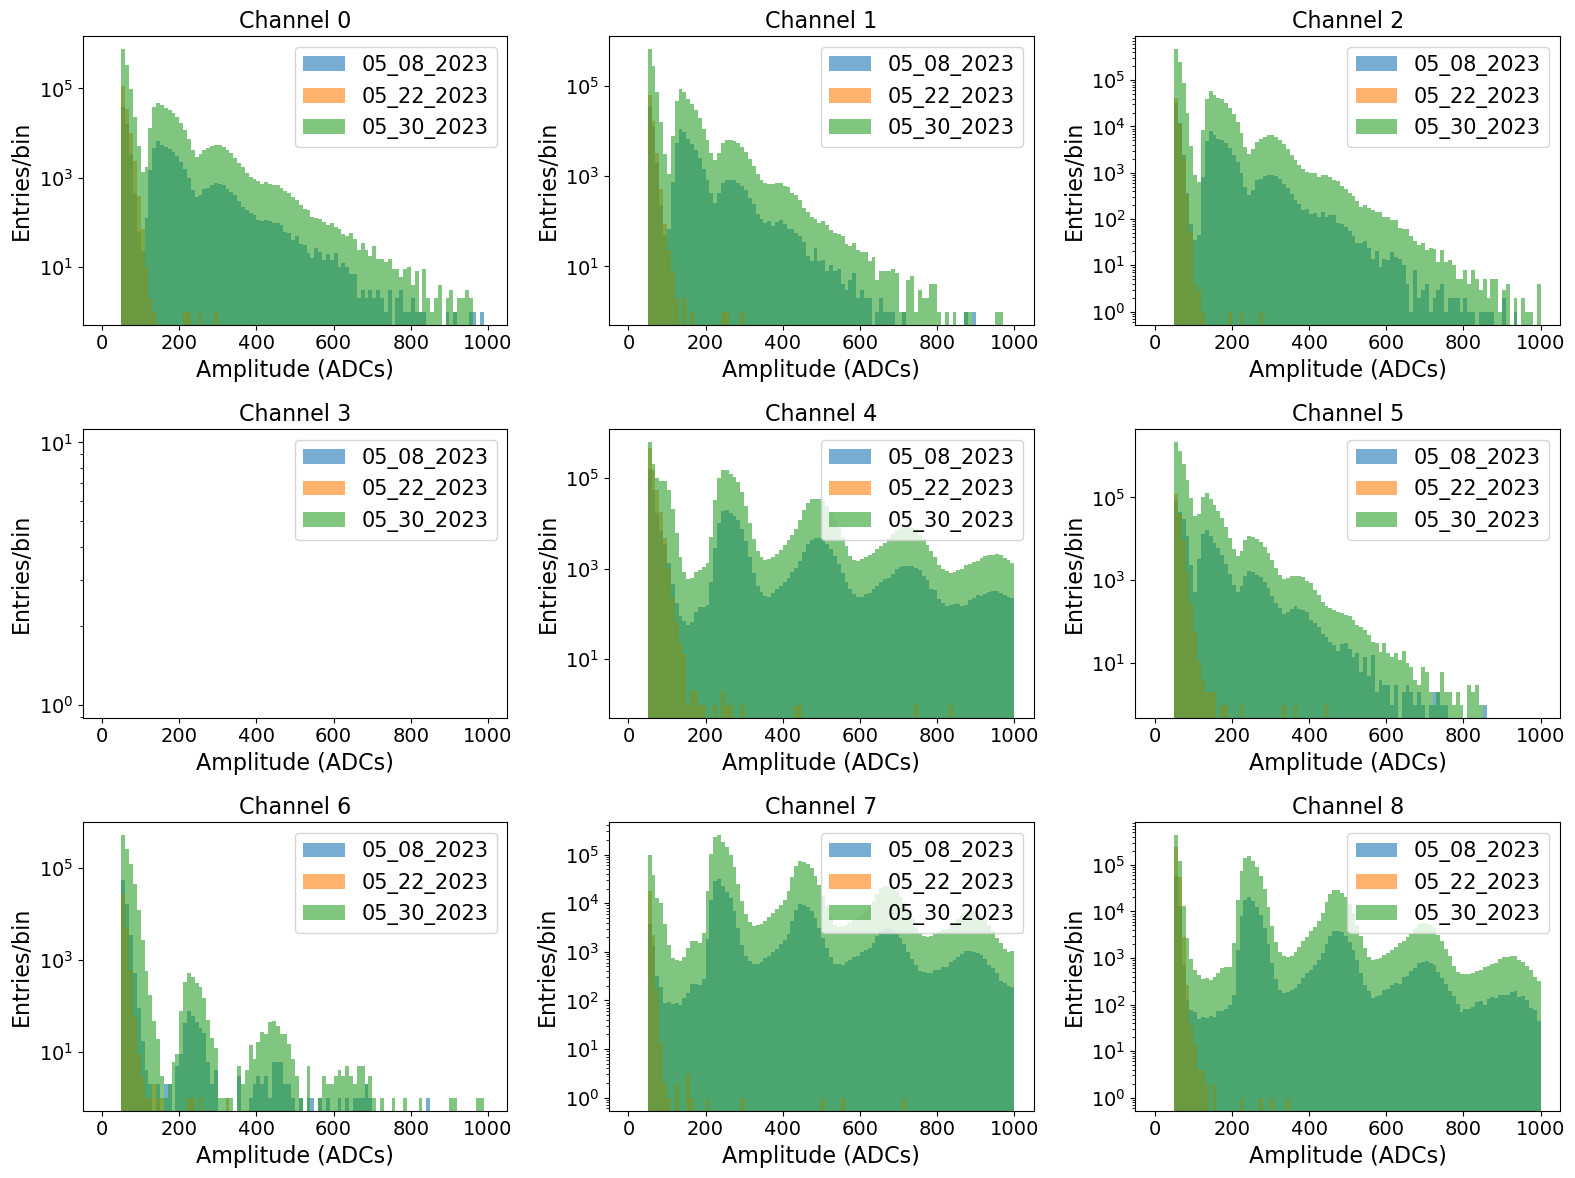

In [19]:
print('')
print('                      ---------------------------------------')
print('                      ----- No XENON (low light levels) -----')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      ----- No XENON (high light levels) ----
                      ---------------------------------------



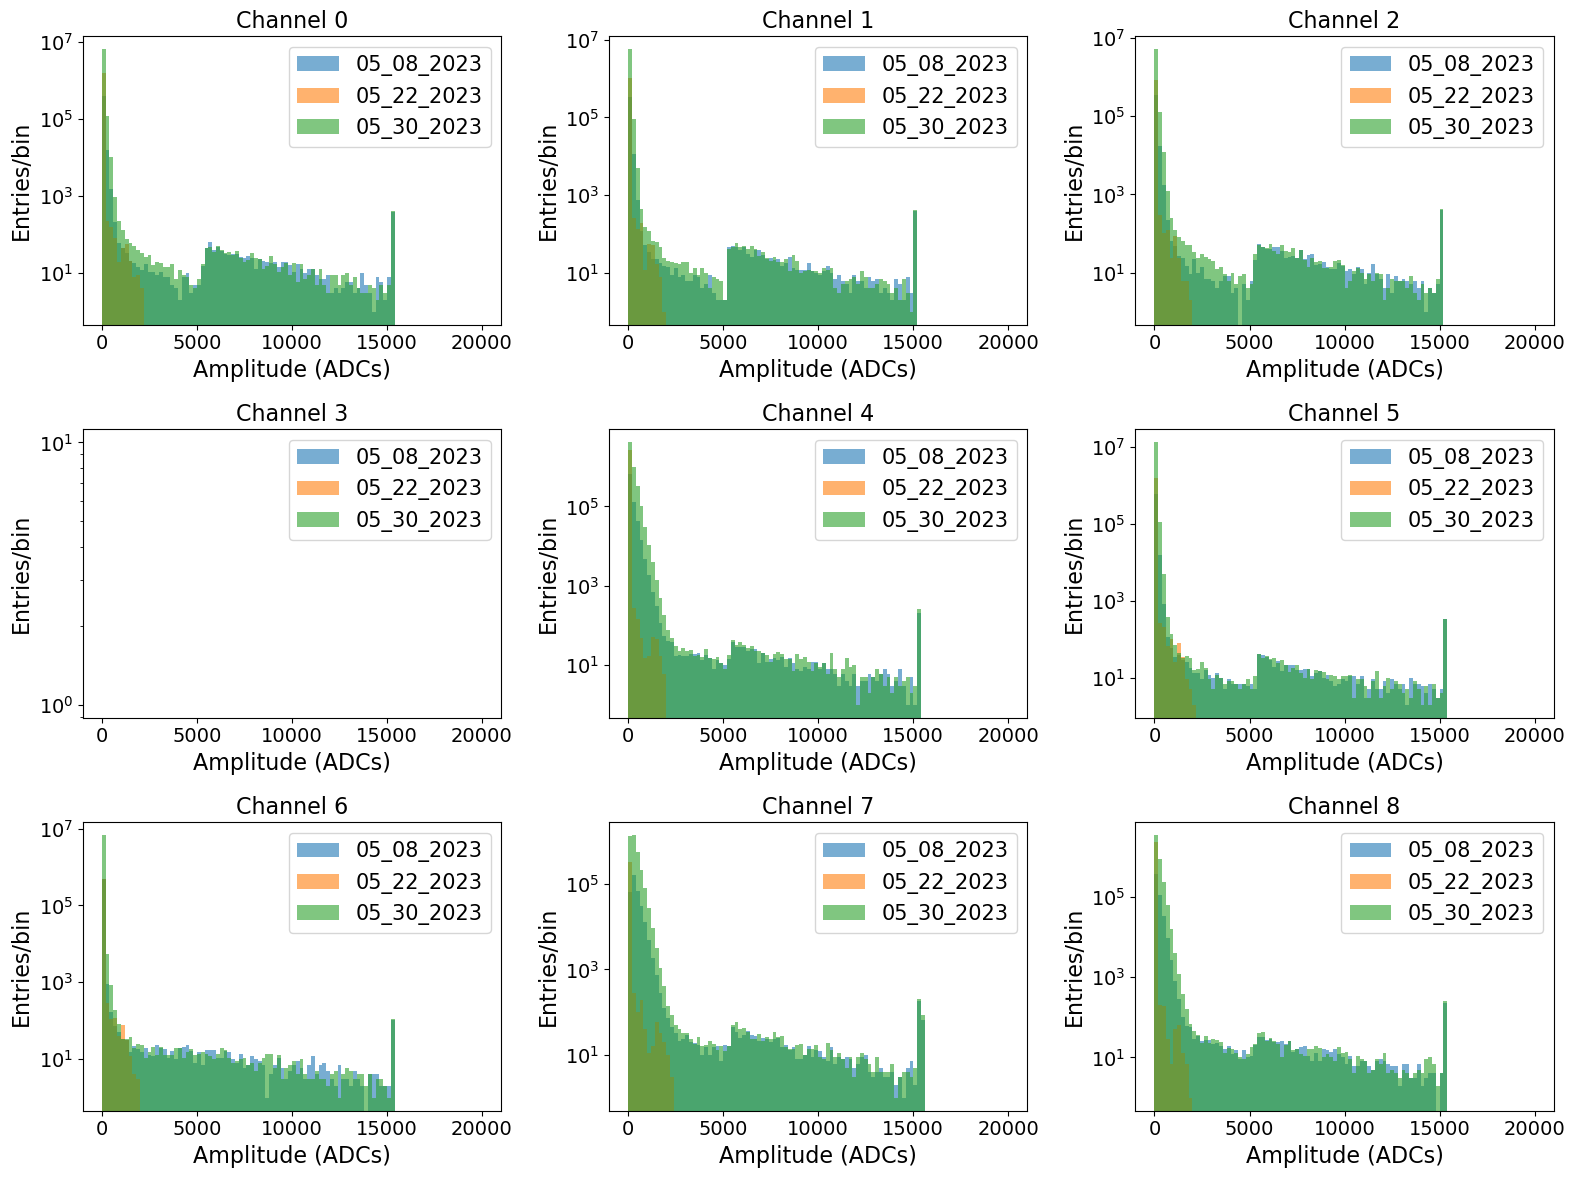

In [22]:
print('')
print('                      ---------------------------------------')
print('                      ----- No XENON (high light levels) ----')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,20000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,20000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,20000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- 0.1 ppm XENON (low light levels) --
                      ---------------------------------------



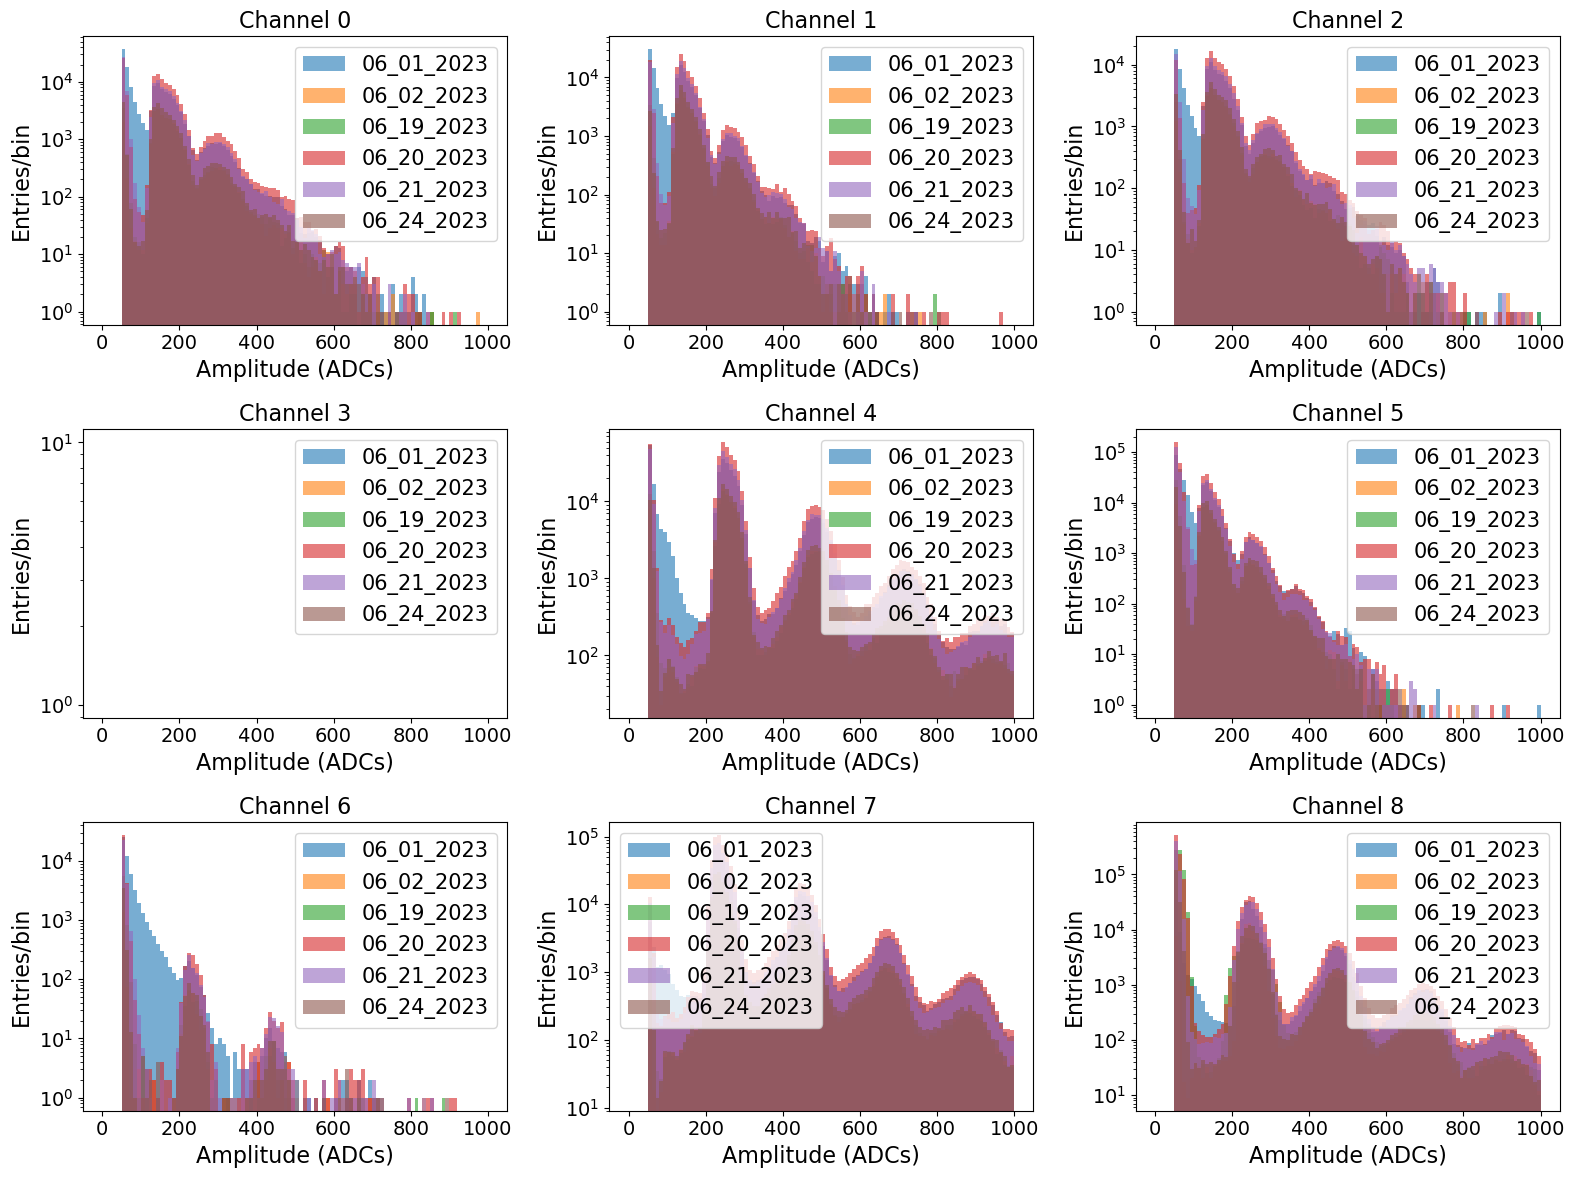

In [20]:
print('')
print('                      ---------------------------------------')
print('                      --- 0.1 ppm XENON (low light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date4][k], bins=100, range=(0,1000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date5][k], bins=100, range=(0,1000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date6][k], bins=100, range=(0,1000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.1 ppm XENON (high light levels) --
                      ---------------------------------------



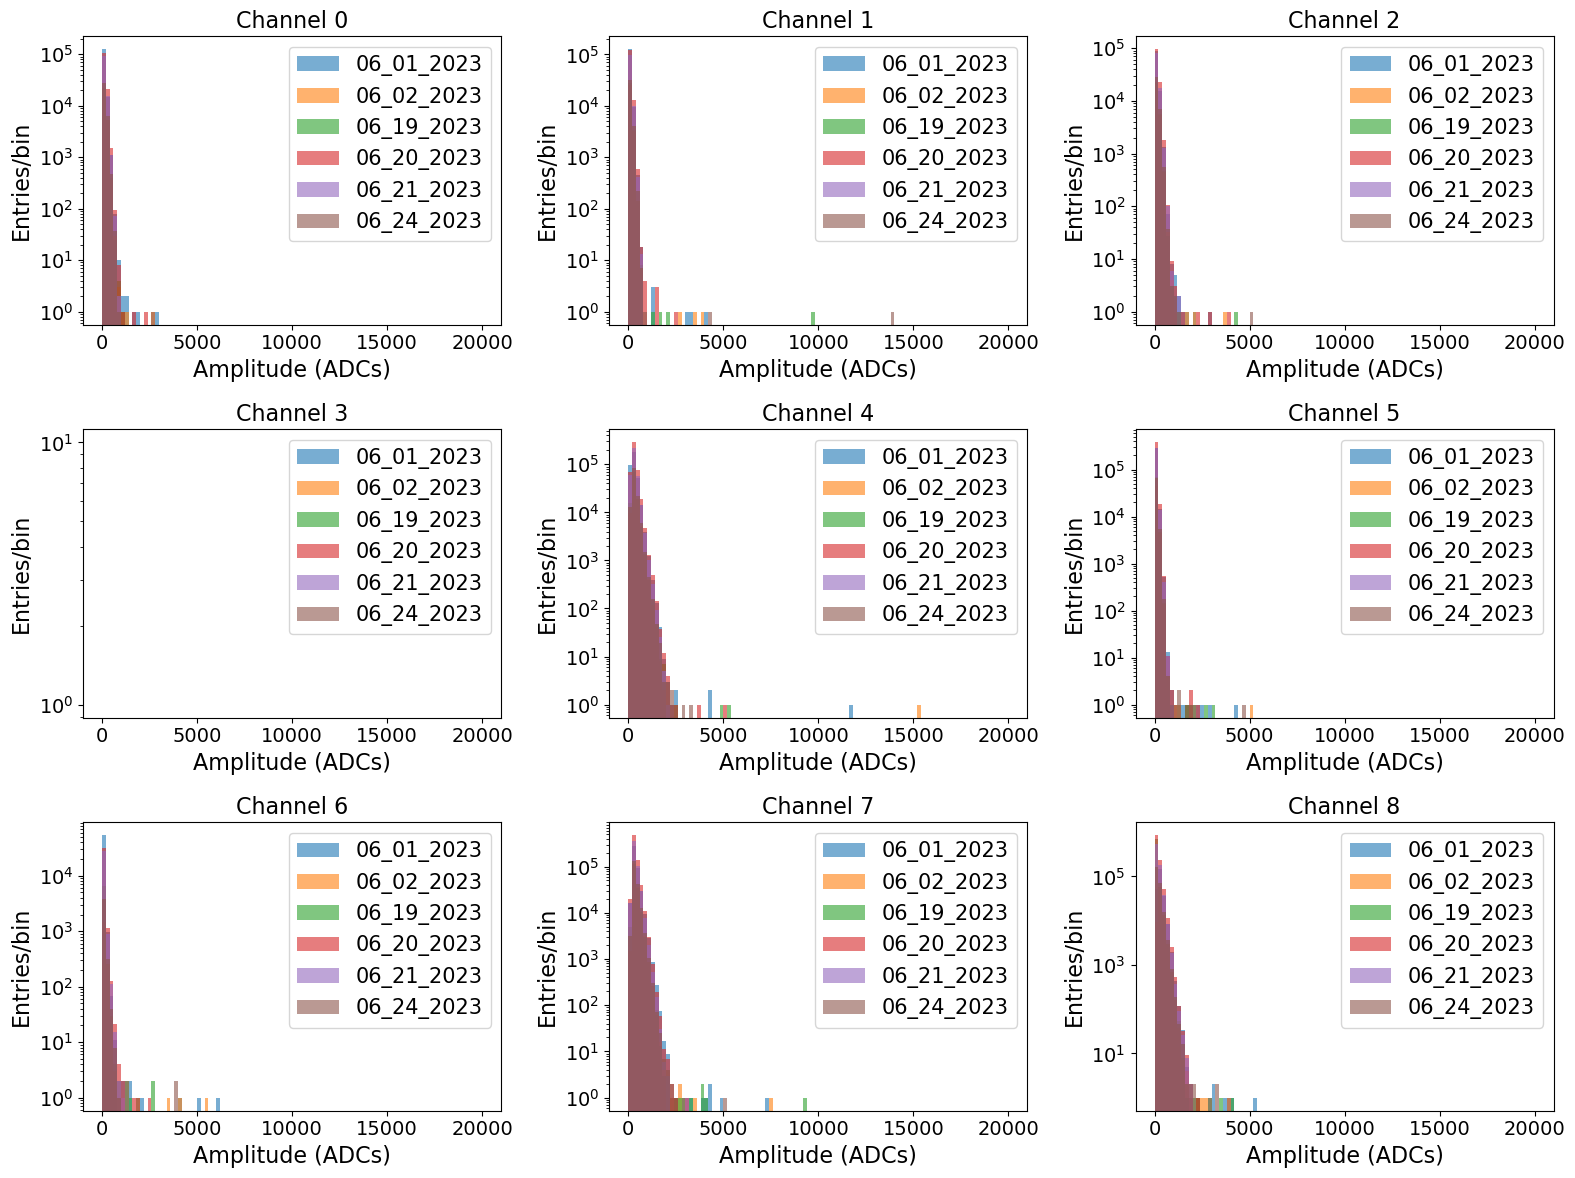

In [21]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.1 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,20000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,20000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,20000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date4][k], bins=100, range=(0,20000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date5][k], bins=100, range=(0,20000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date6][k], bins=100, range=(0,20000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- 0.2 ppm XENON (low light levels) --
                      ---------------------------------------



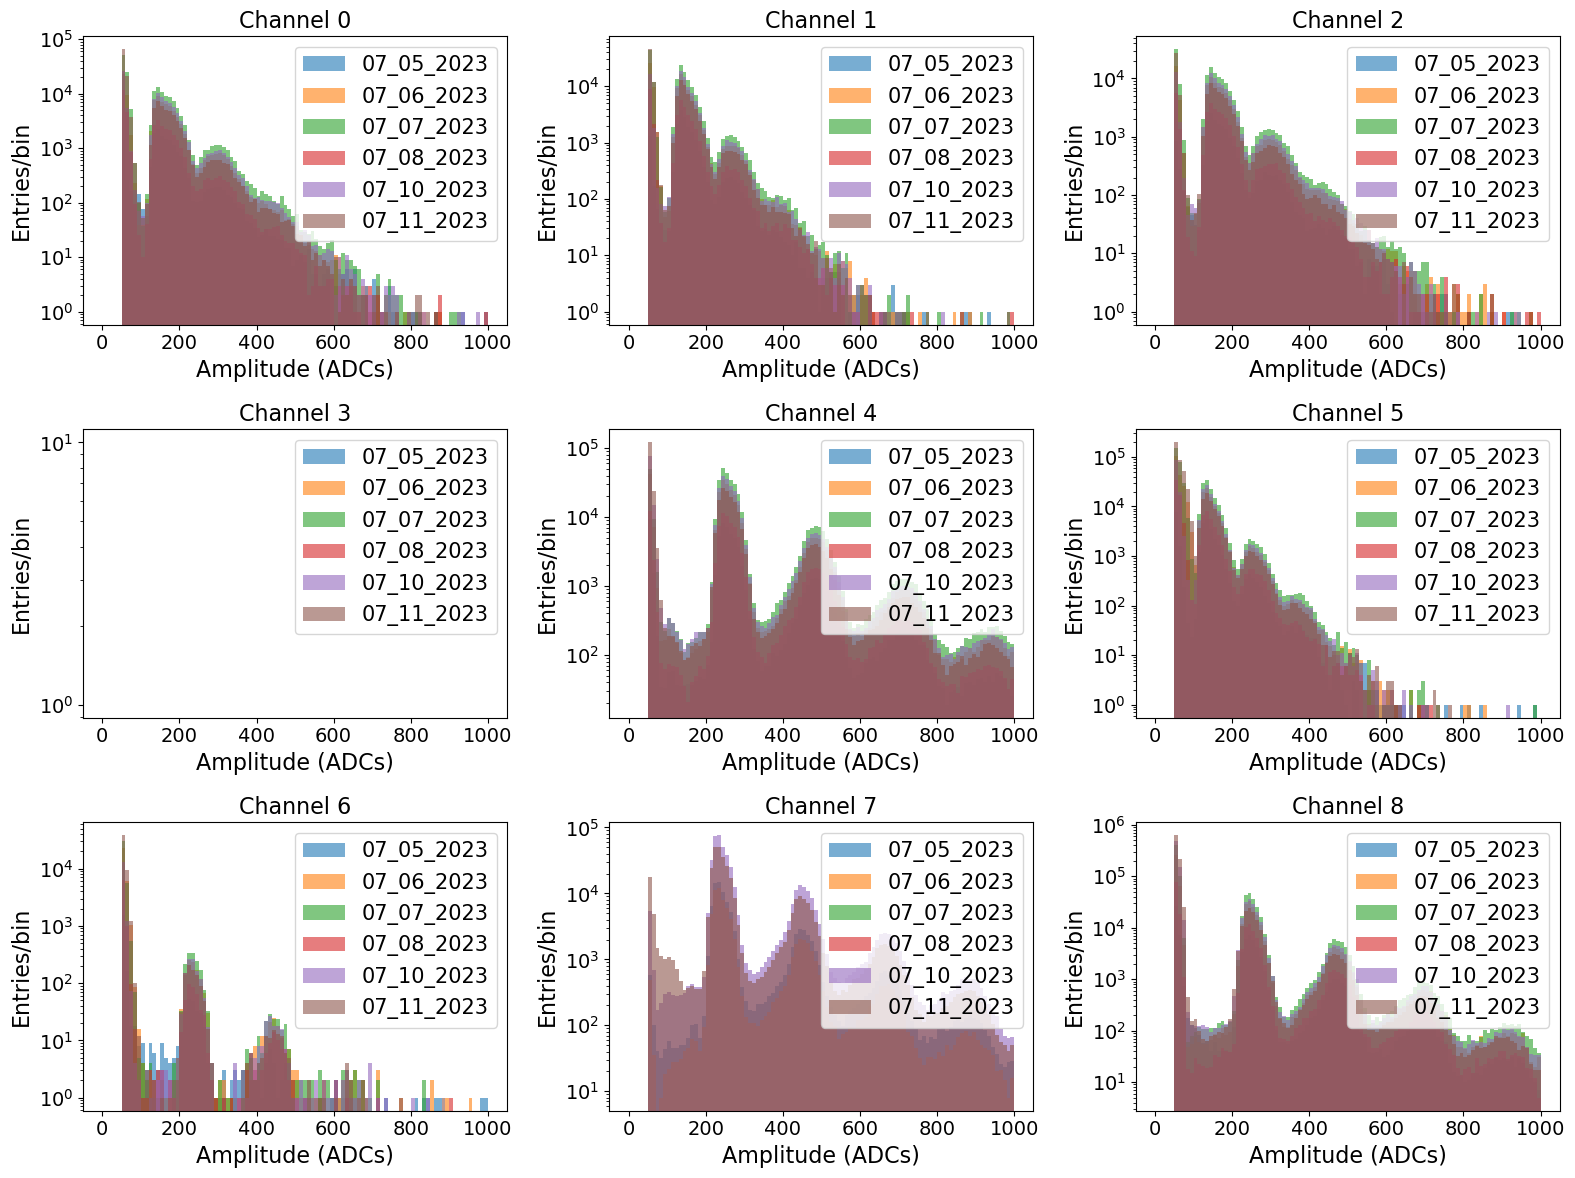

In [22]:
print('')
print('                      ---------------------------------------')
print('                      --- 0.2 ppm XENON (low light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date4][k], bins=100, range=(0,1000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date5][k], bins=100, range=(0,1000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date6][k], bins=100, range=(0,1000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.2 ppm XENON (high light levels) --
                      ---------------------------------------



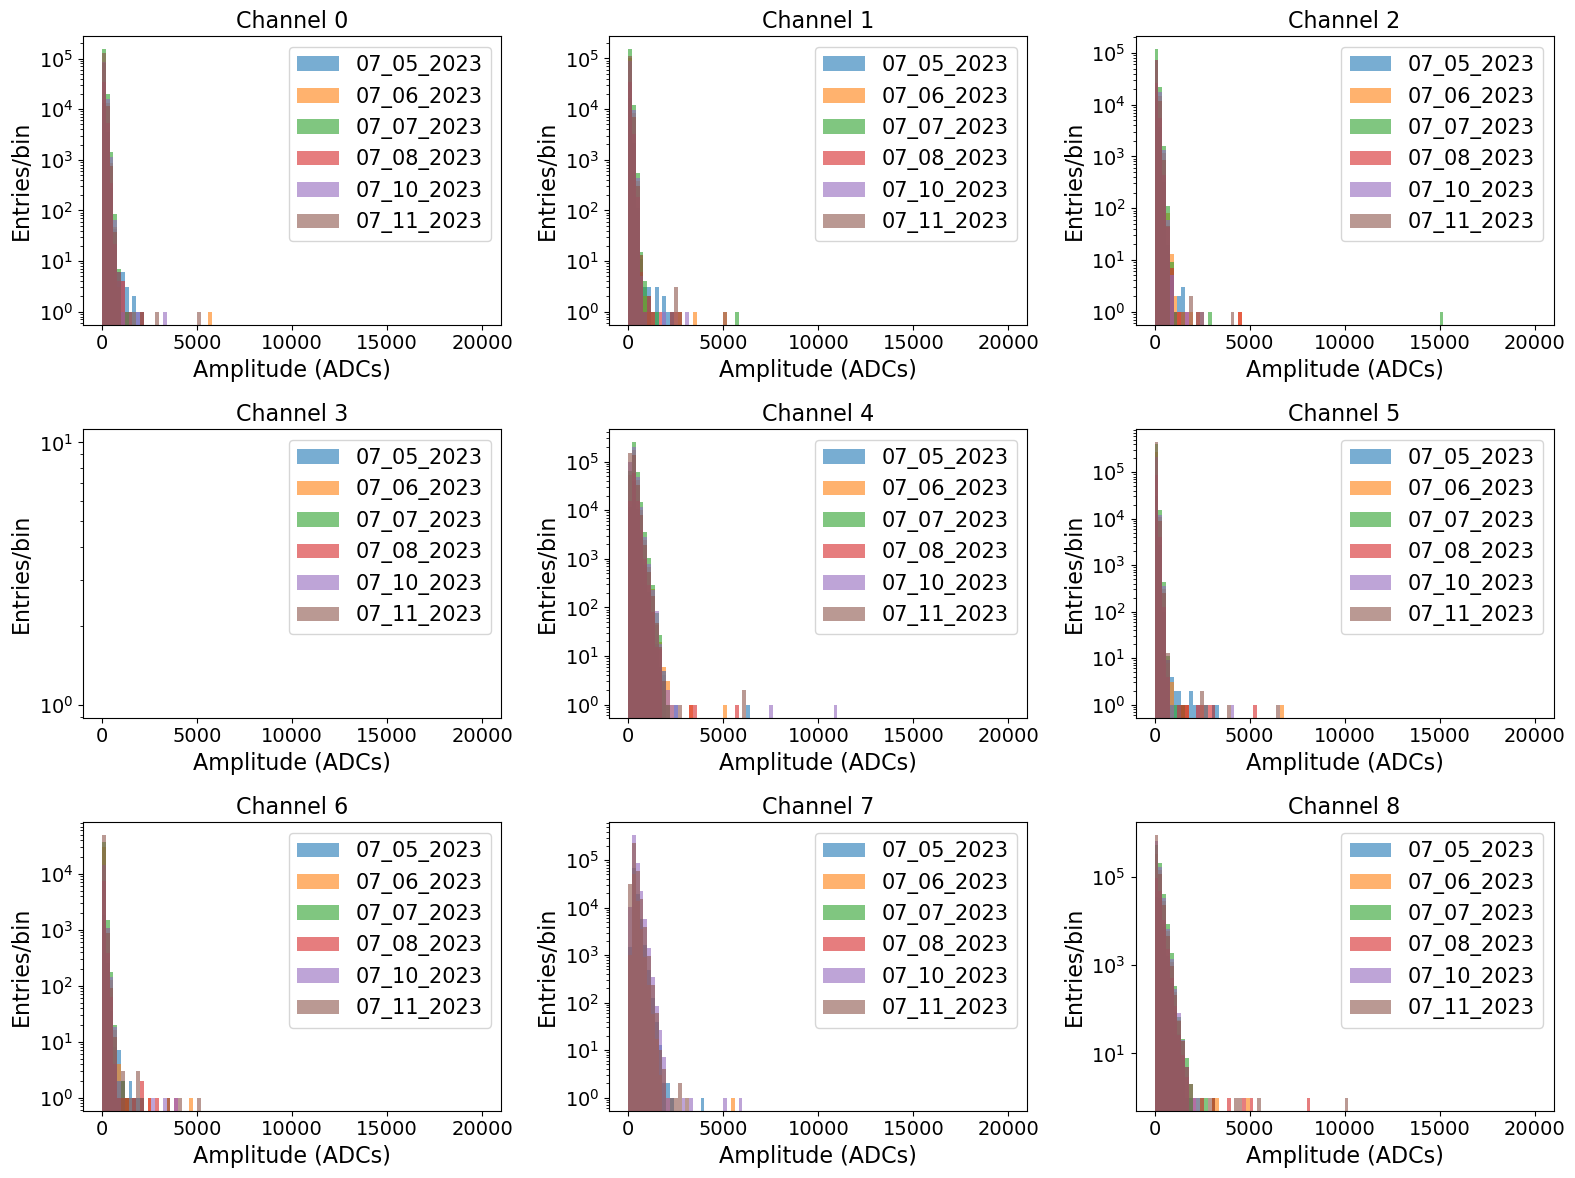

In [23]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.2 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,20000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,20000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,20000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date4][k], bins=100, range=(0,20000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date5][k], bins=100, range=(0,20000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date6][k], bins=100, range=(0,20000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

## Compare the different amount of Xenon:


                      ---------------------------------------
                      -- Height of peaks (low light levels) -
                      ---------------------------------------



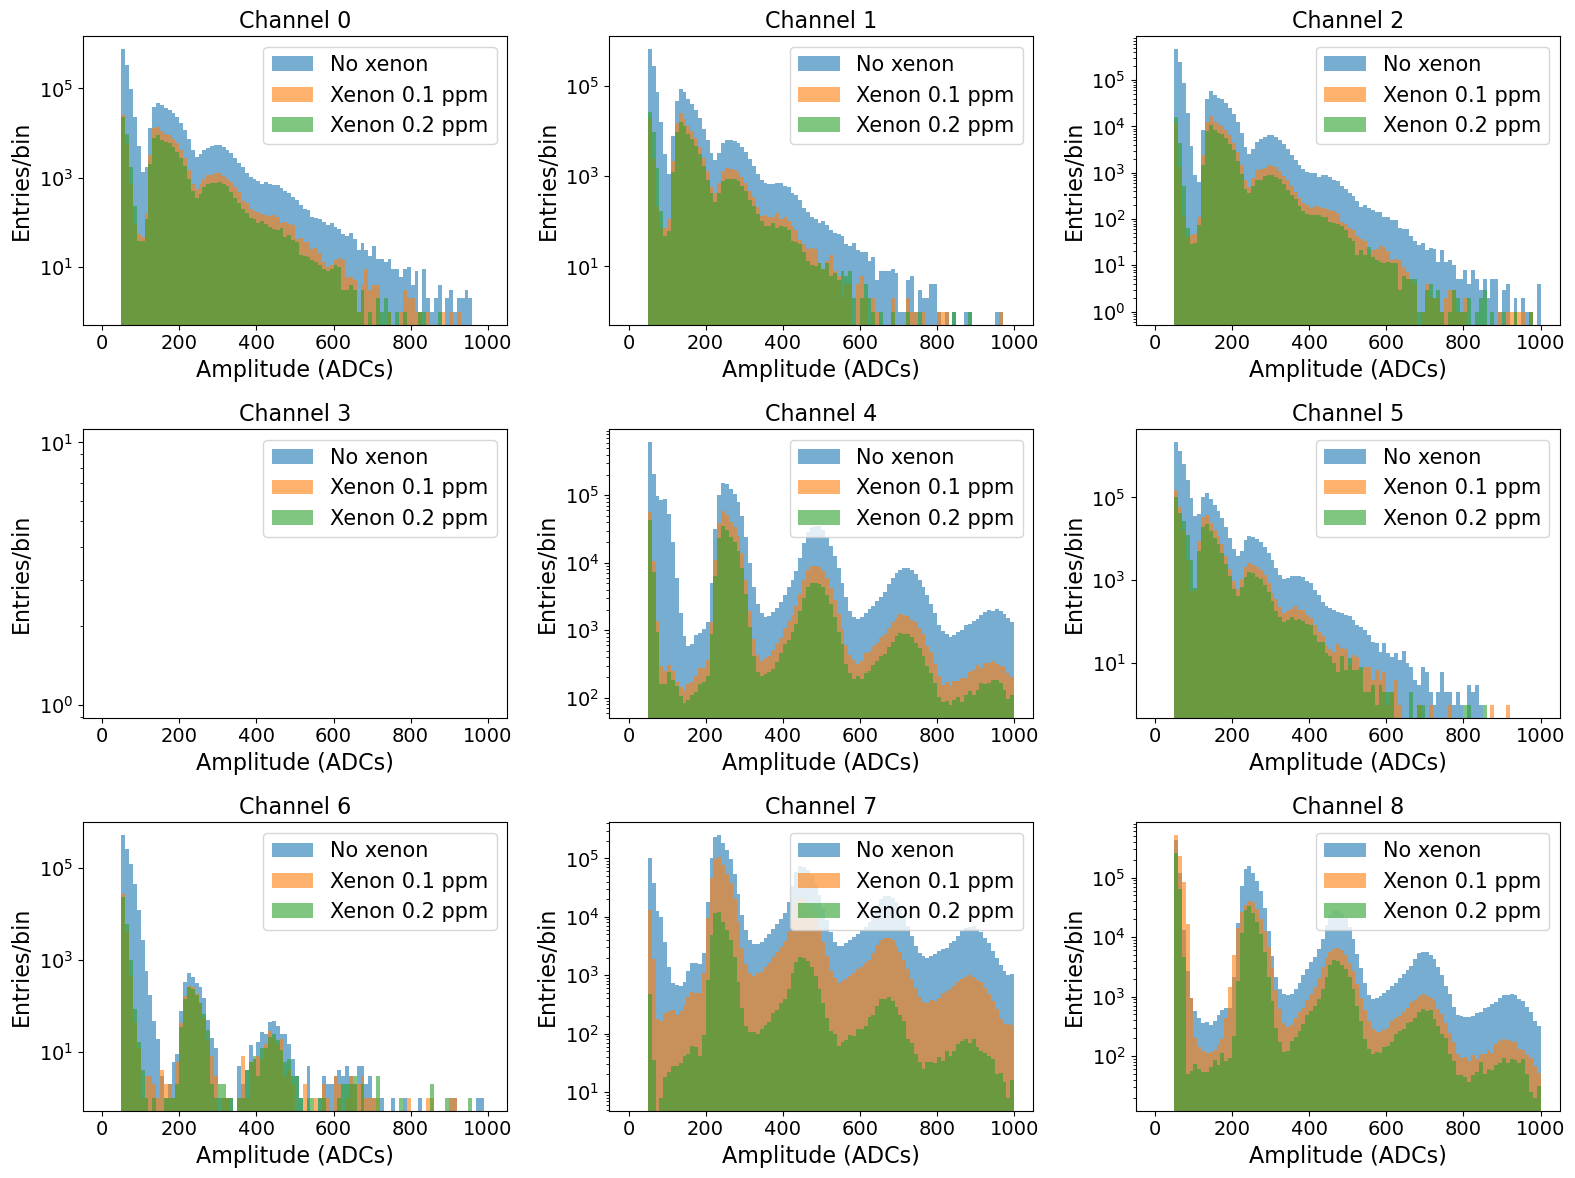

In [24]:
print('')
print('                      ---------------------------------------')
print('                      -- Height of peaks (low light levels) -')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,1000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,1000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,1000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      - Height of peaks (high light levels) -
                      ---------------------------------------



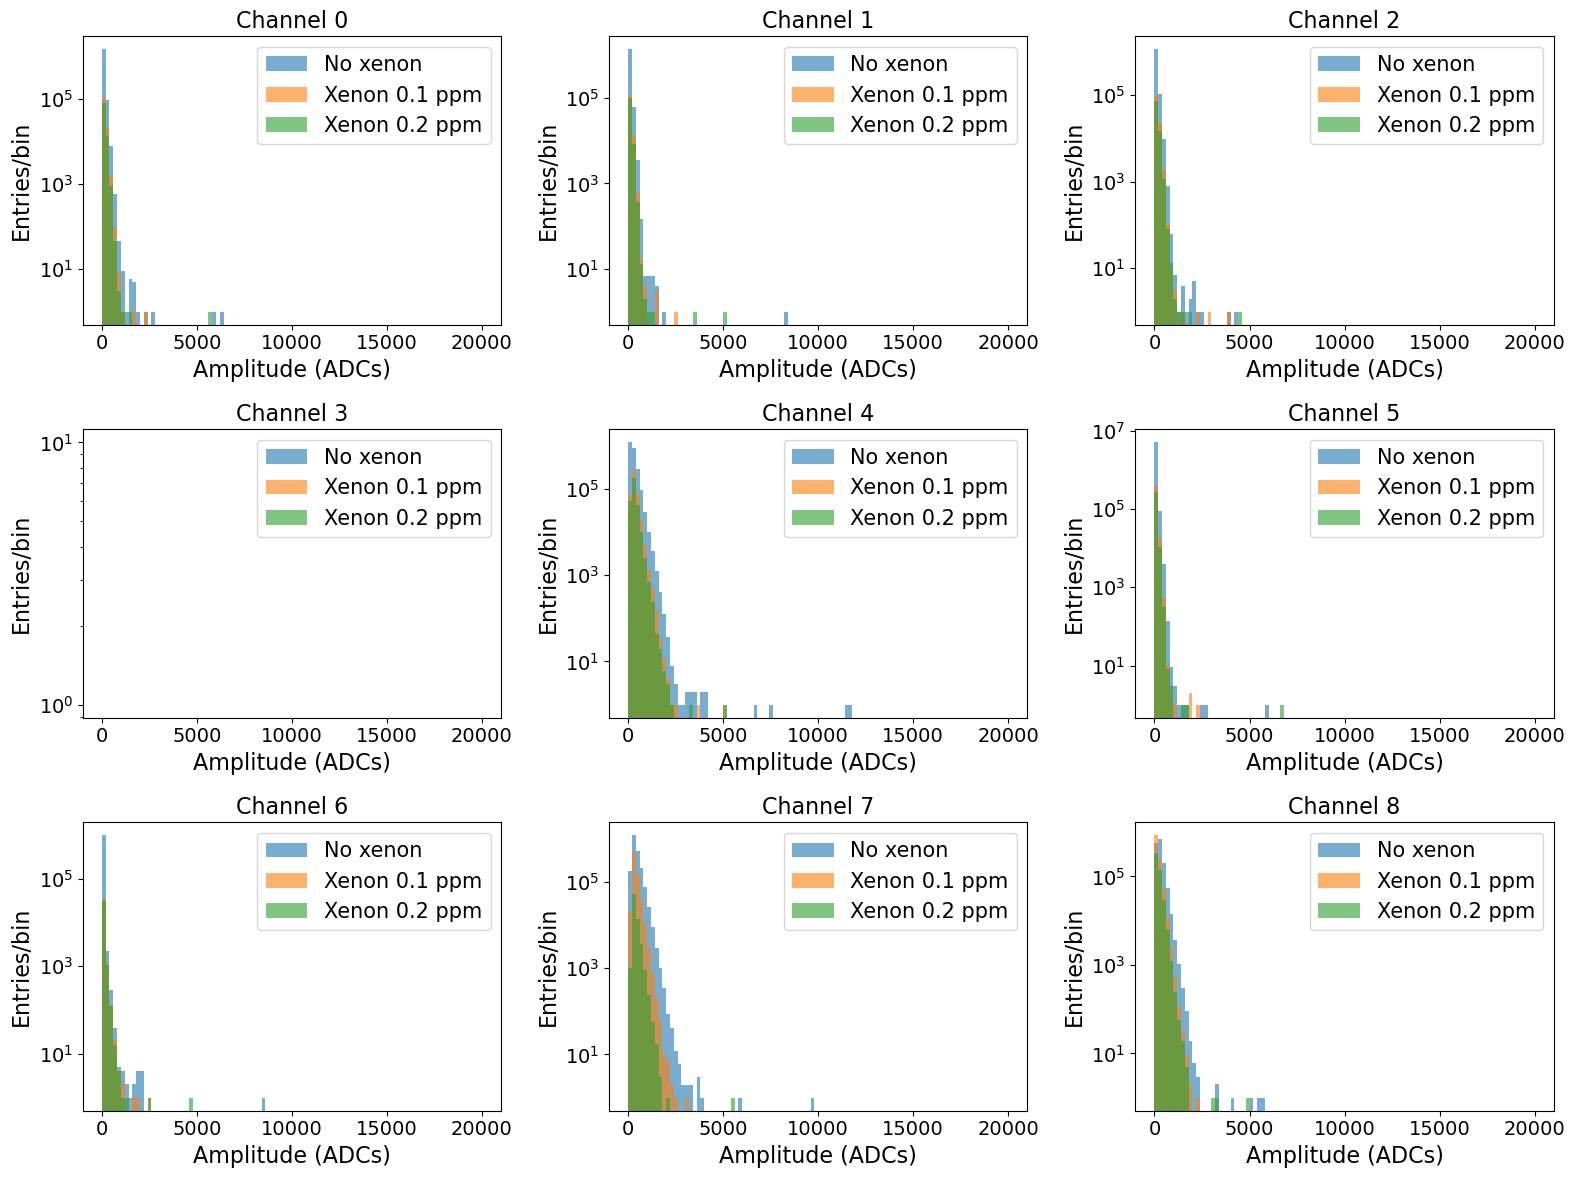

In [25]:
print('')
print('                      ---------------------------------------')
print('                      - Height of peaks (high light levels) -')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_height_all_channels_dict[select_date1][k], bins=100, range=(0,20000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date2][k], bins=100, range=(0,20000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_height_all_channels_dict[select_date3][k], bins=100, range=(0,20000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

## Integration of peaks until the wf reaches negative values


                      ---------------------------------------
                      ----- No XENON (high light levels) ----
                      ---------------------------------------



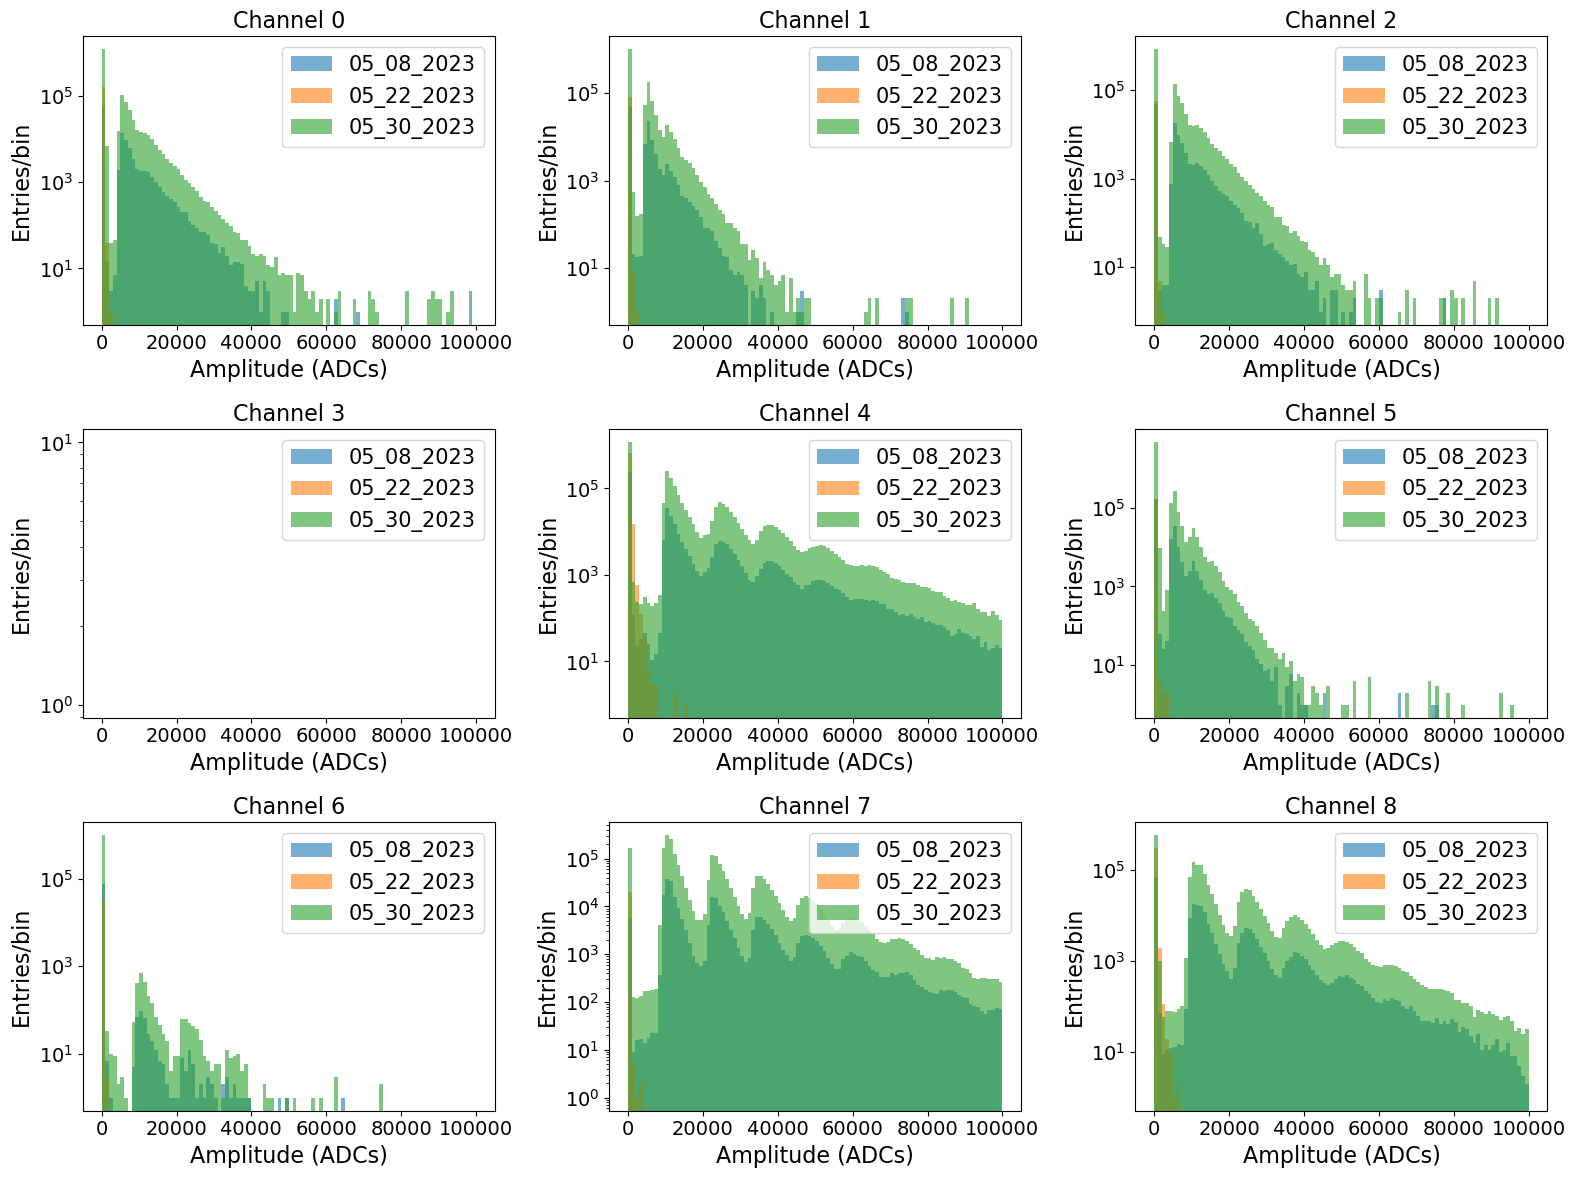

In [26]:
print('')
print('                      ---------------------------------------')
print('                      ----- No XENON (high light levels) ----')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.1 ppm XENON (high light levels) --
                      ---------------------------------------



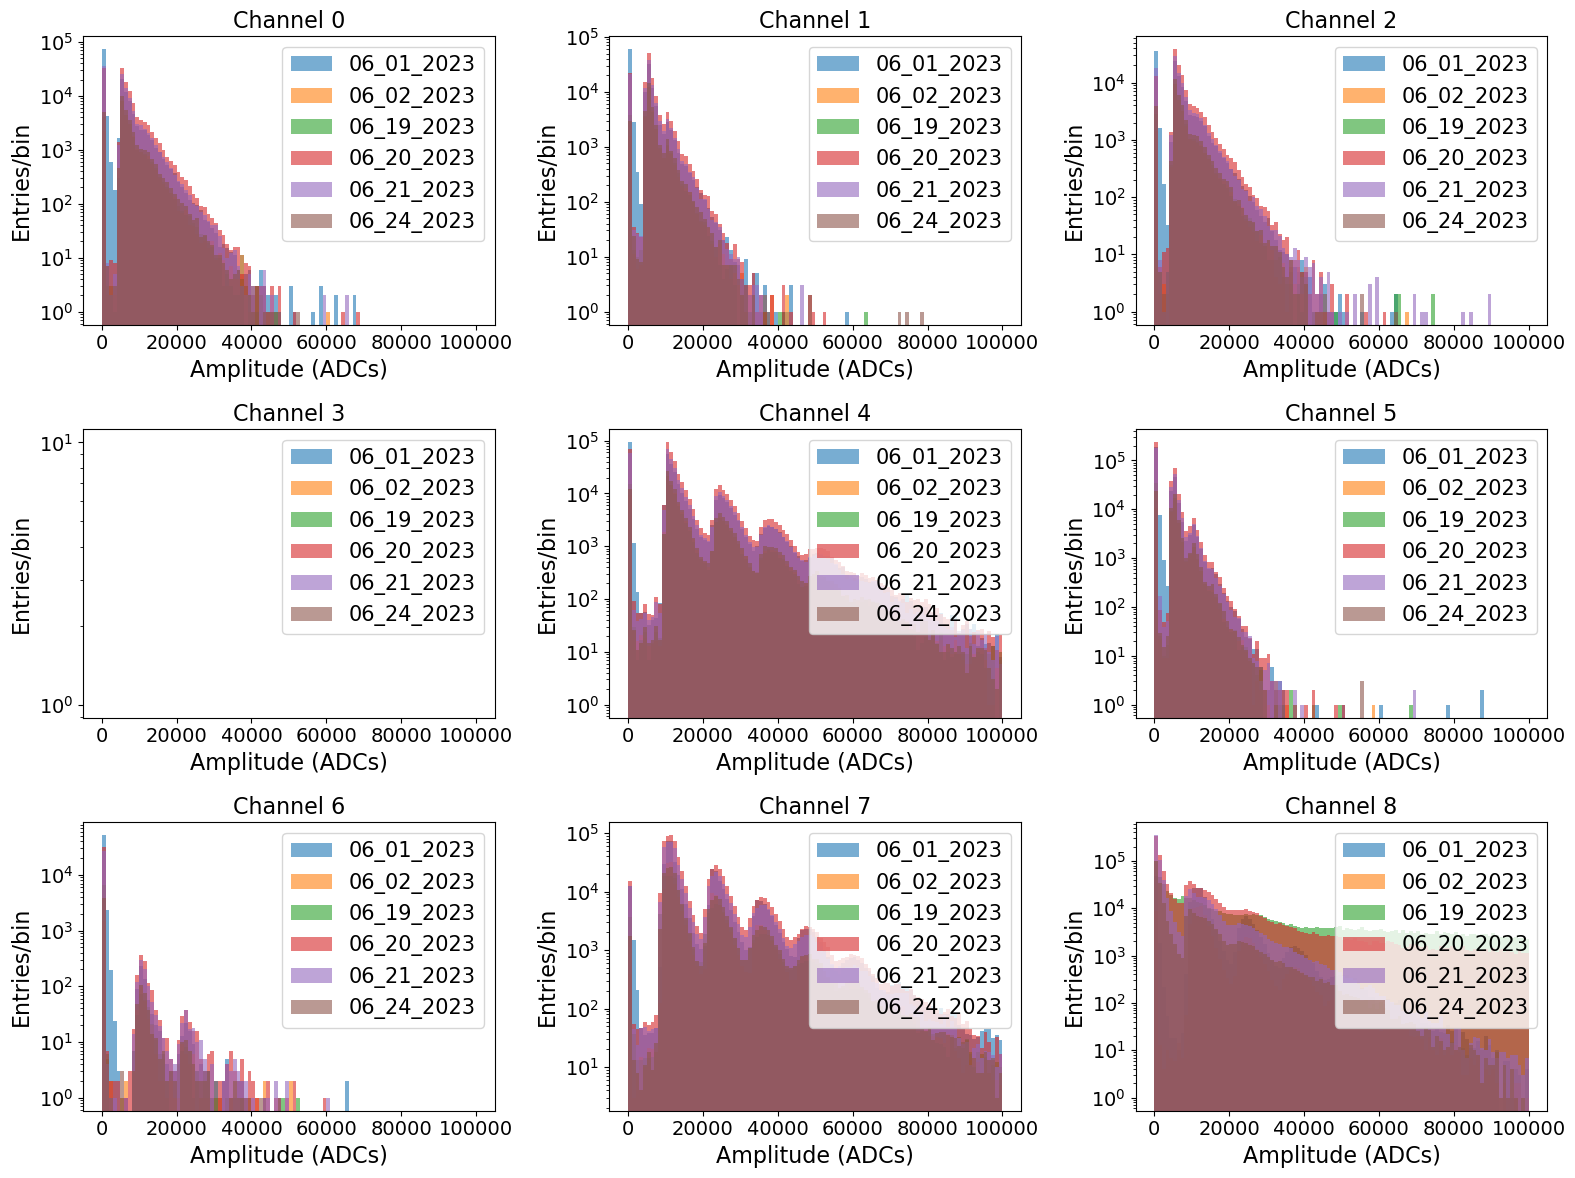

In [27]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.1 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date4][k], bins=100, range=(0,100000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date5][k], bins=100, range=(0,100000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date6][k], bins=100, range=(0,100000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.2 ppm XENON (high light levels) --
                      ---------------------------------------



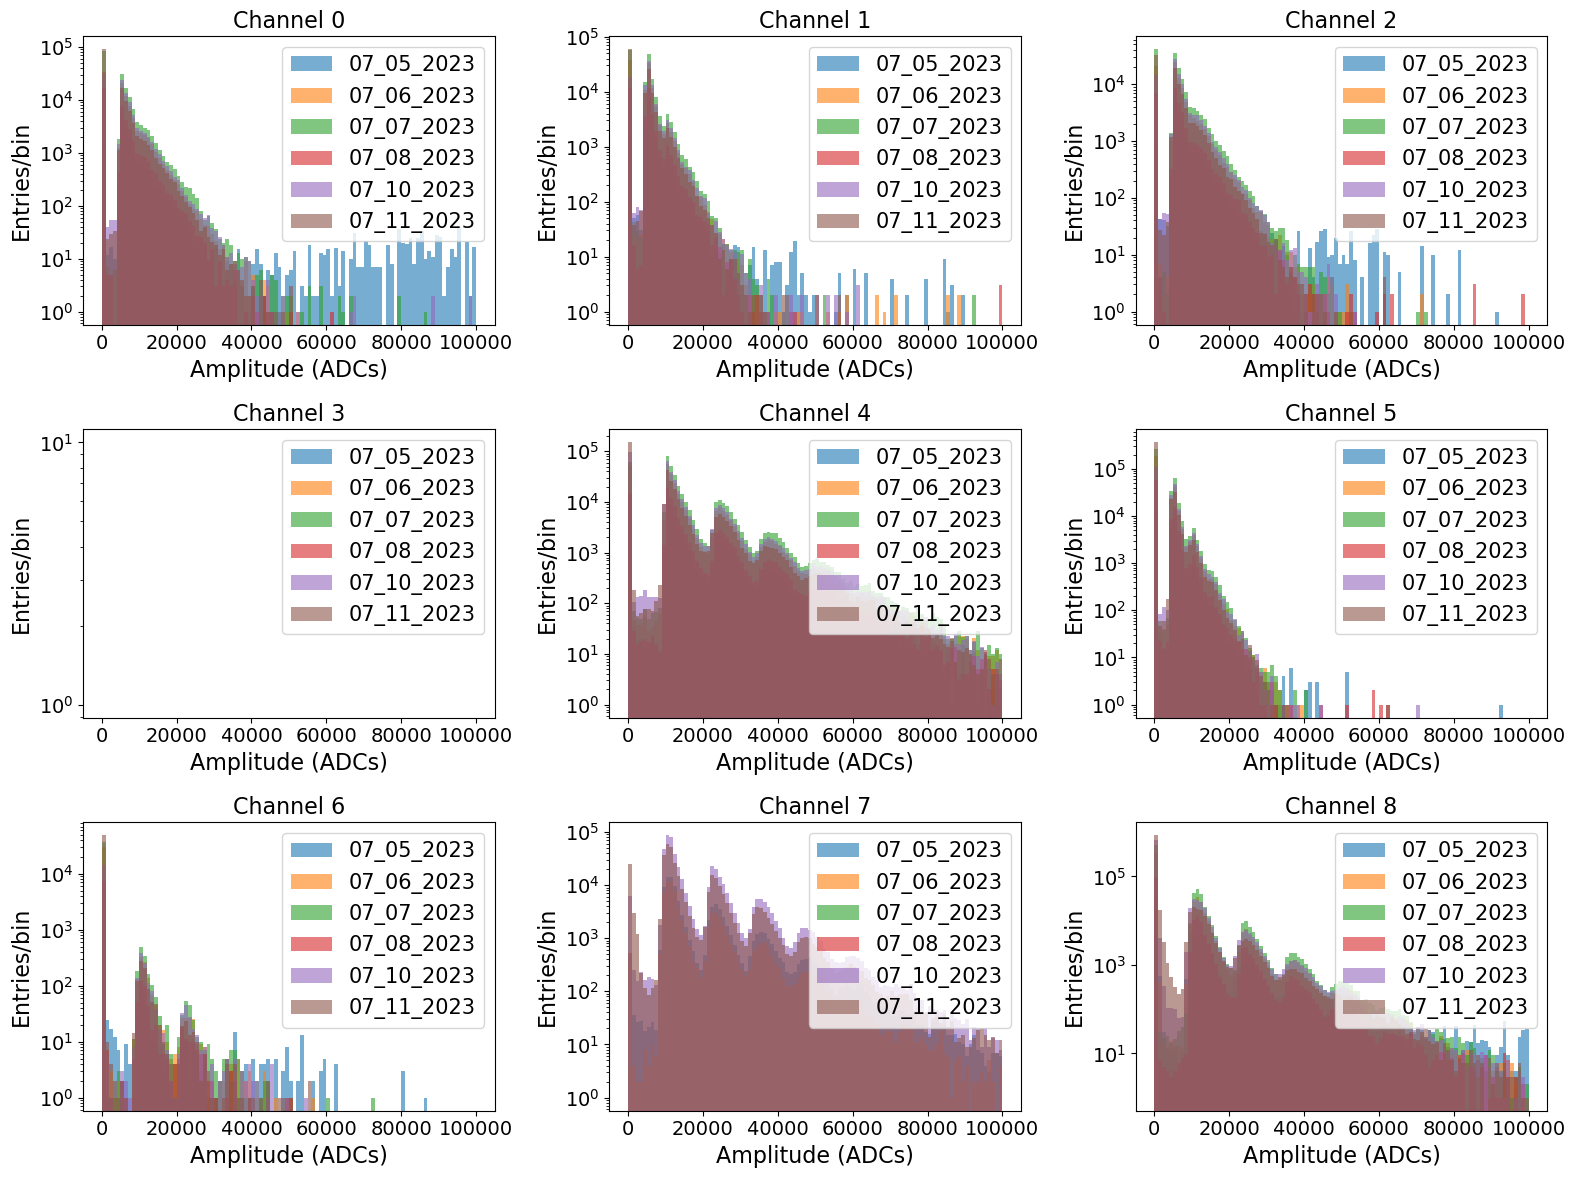

In [28]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.2 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date4][k], bins=100, range=(0,100000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date5][k], bins=100, range=(0,100000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date6][k], bins=100, range=(0,100000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

## Compare the different amount of Xenon


                      ---------------------------------------
                      --- Peak integ 1 (high light levels) --
                      ---------------------------------------



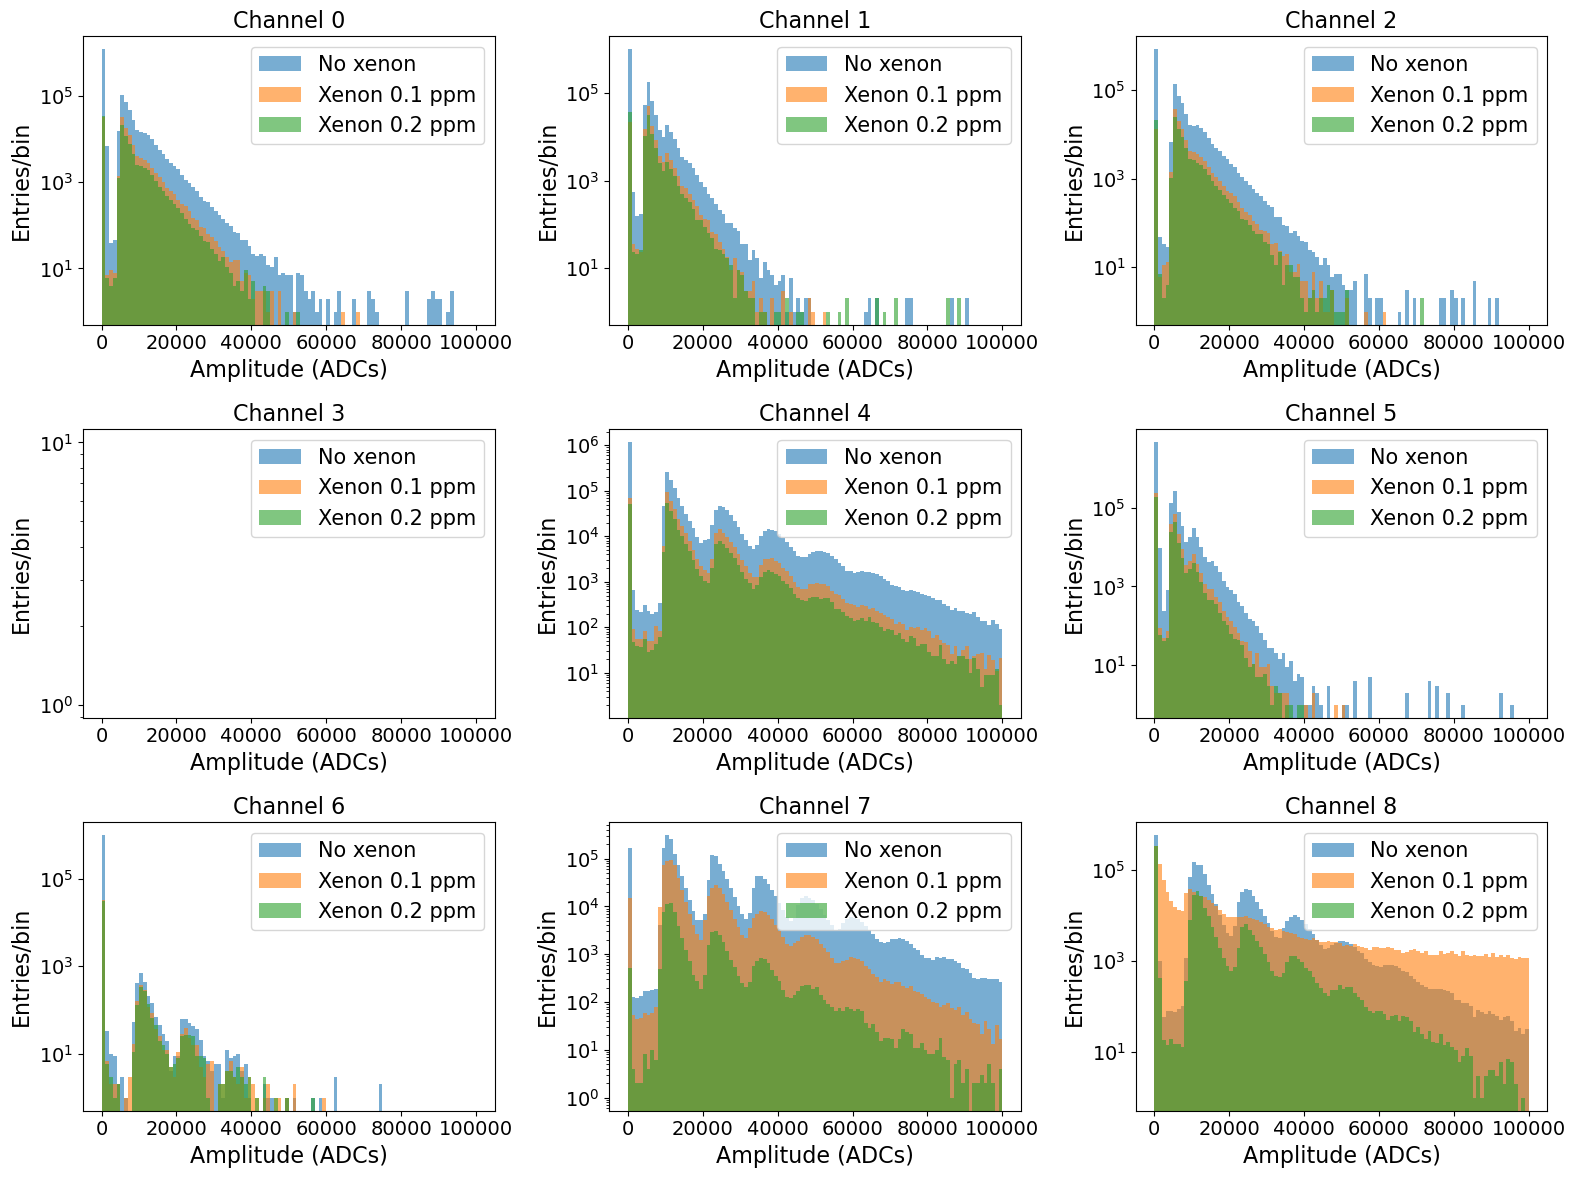

In [29]:
print('')
print('                      ---------------------------------------')
print('                      --- Peak integ 1 (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- Peak integ 1 (high light levels) --
                      ---------------------------------------



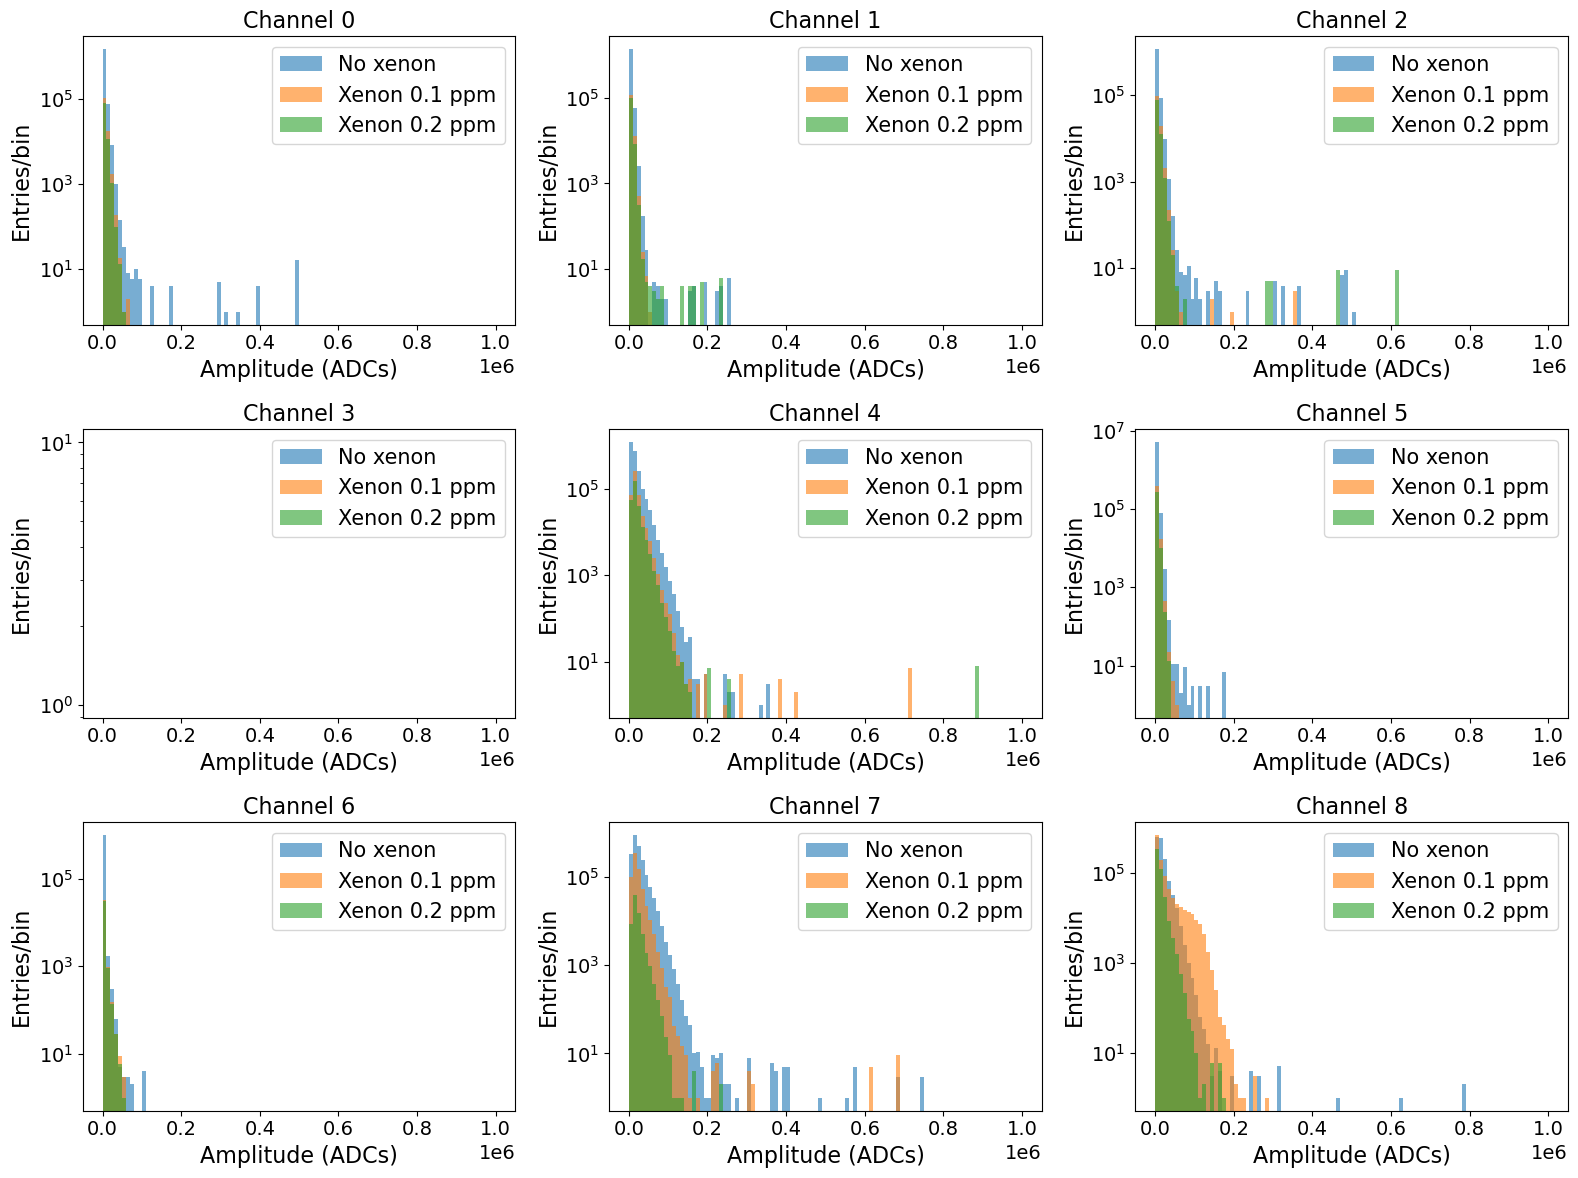

In [30]:
print('')
print('                      ---------------------------------------')
print('                      --- Peak integ 1 (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_06_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_all_channels_dict[select_date1][k], bins=100, range=(0,1000000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date2][k], bins=100, range=(0,1000000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_all_channels_dict[select_date3][k], bins=100, range=(0,1000000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

## Integration of peaks with Zero Suppression


                      ---------------------------------------
                      ----- No XENON (low light levels) -----
                      ---------------------------------------



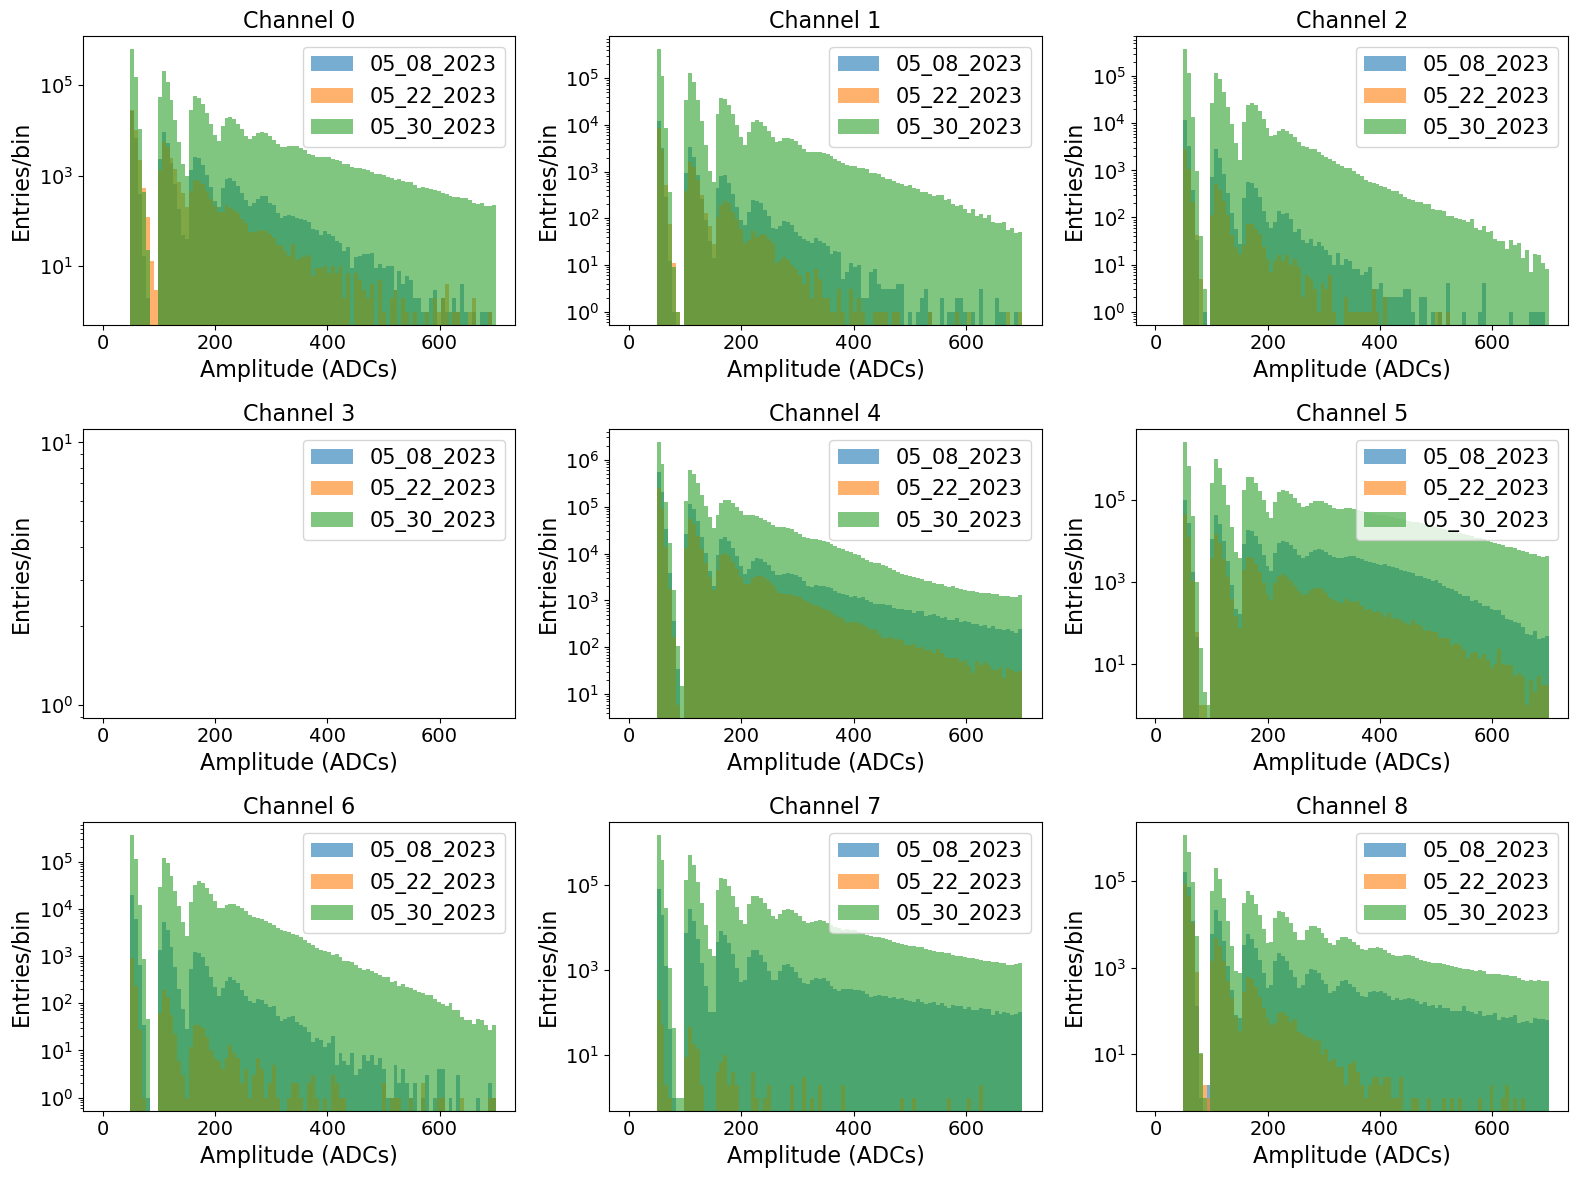

In [31]:
print('')
print('                      ---------------------------------------')
print('                      ----- No XENON (low light levels) -----')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,700), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,700), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,700), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      ----- No XENON (high light levels) ----
                      ---------------------------------------



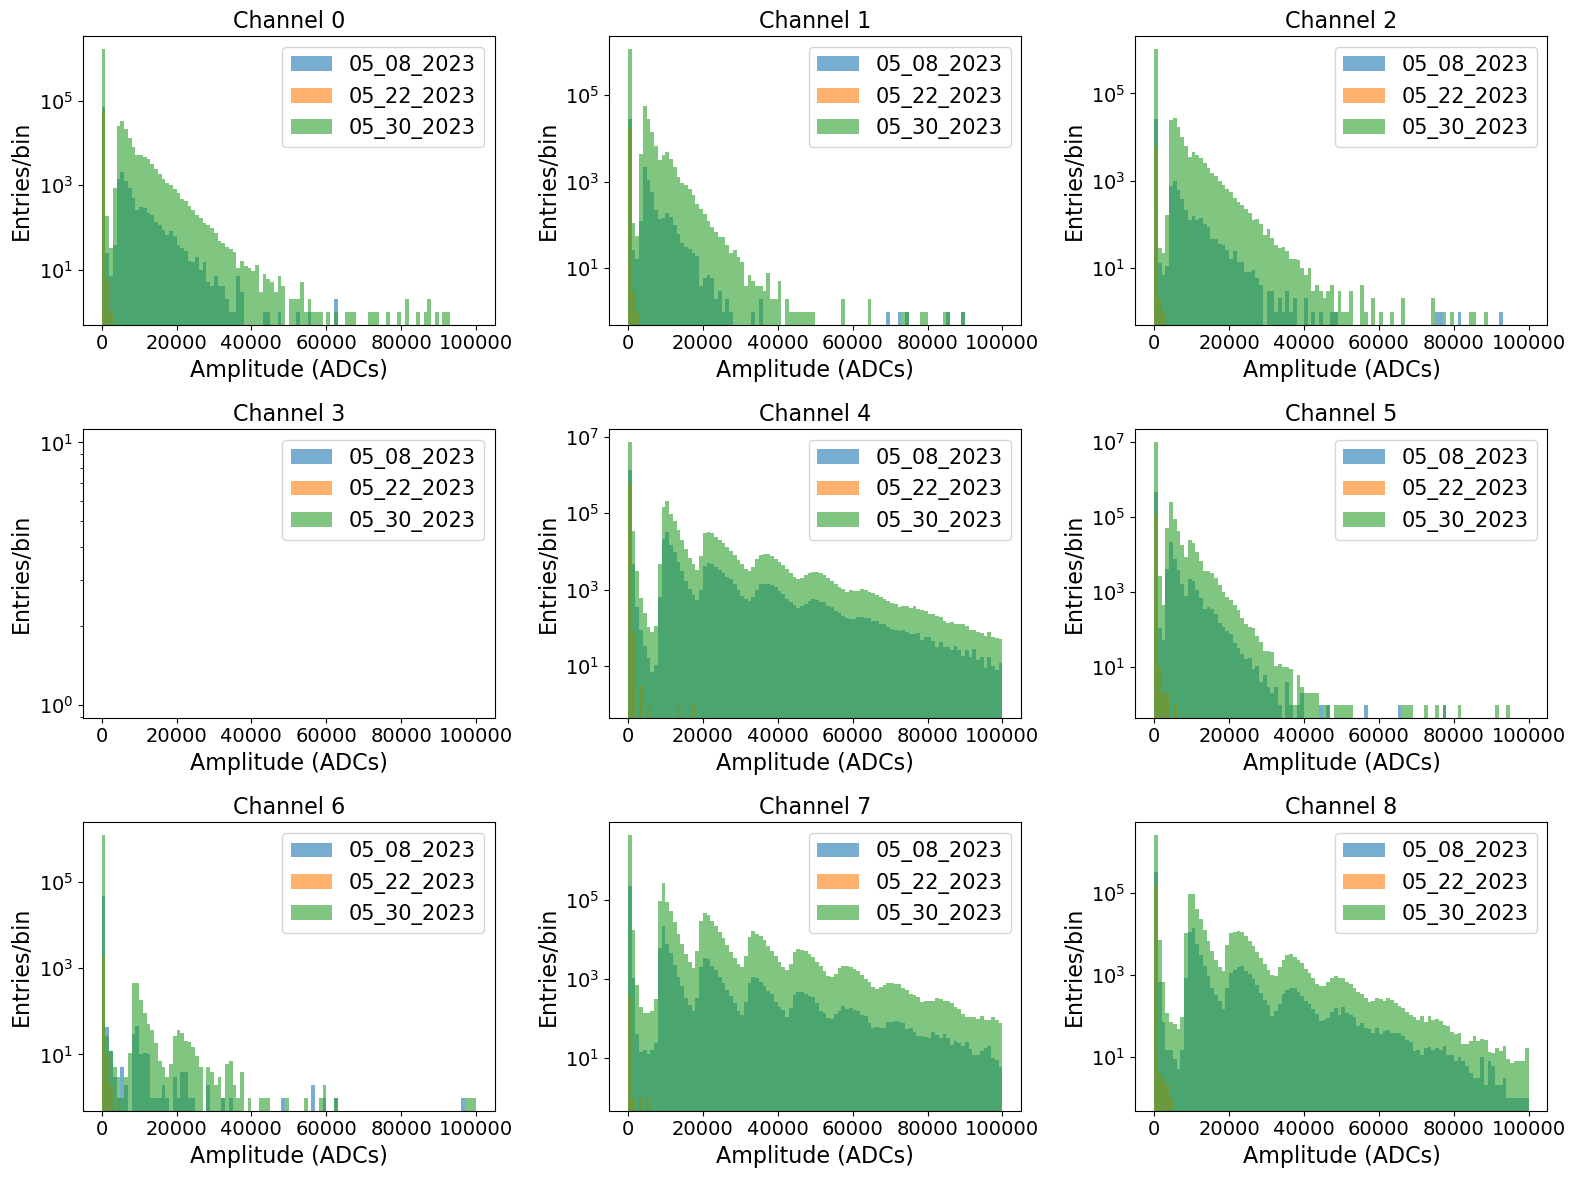

In [32]:
print('')
print('                      ---------------------------------------')
print('                      ----- No XENON (high light levels) ----')
print('                      ---------------------------------------')
print('')

select_date1 = '05_08_2023'
select_date2 = '05_22_2023'
select_date3 = '05_30_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- 0.1 ppm XENON (low light levels) --
                      ---------------------------------------



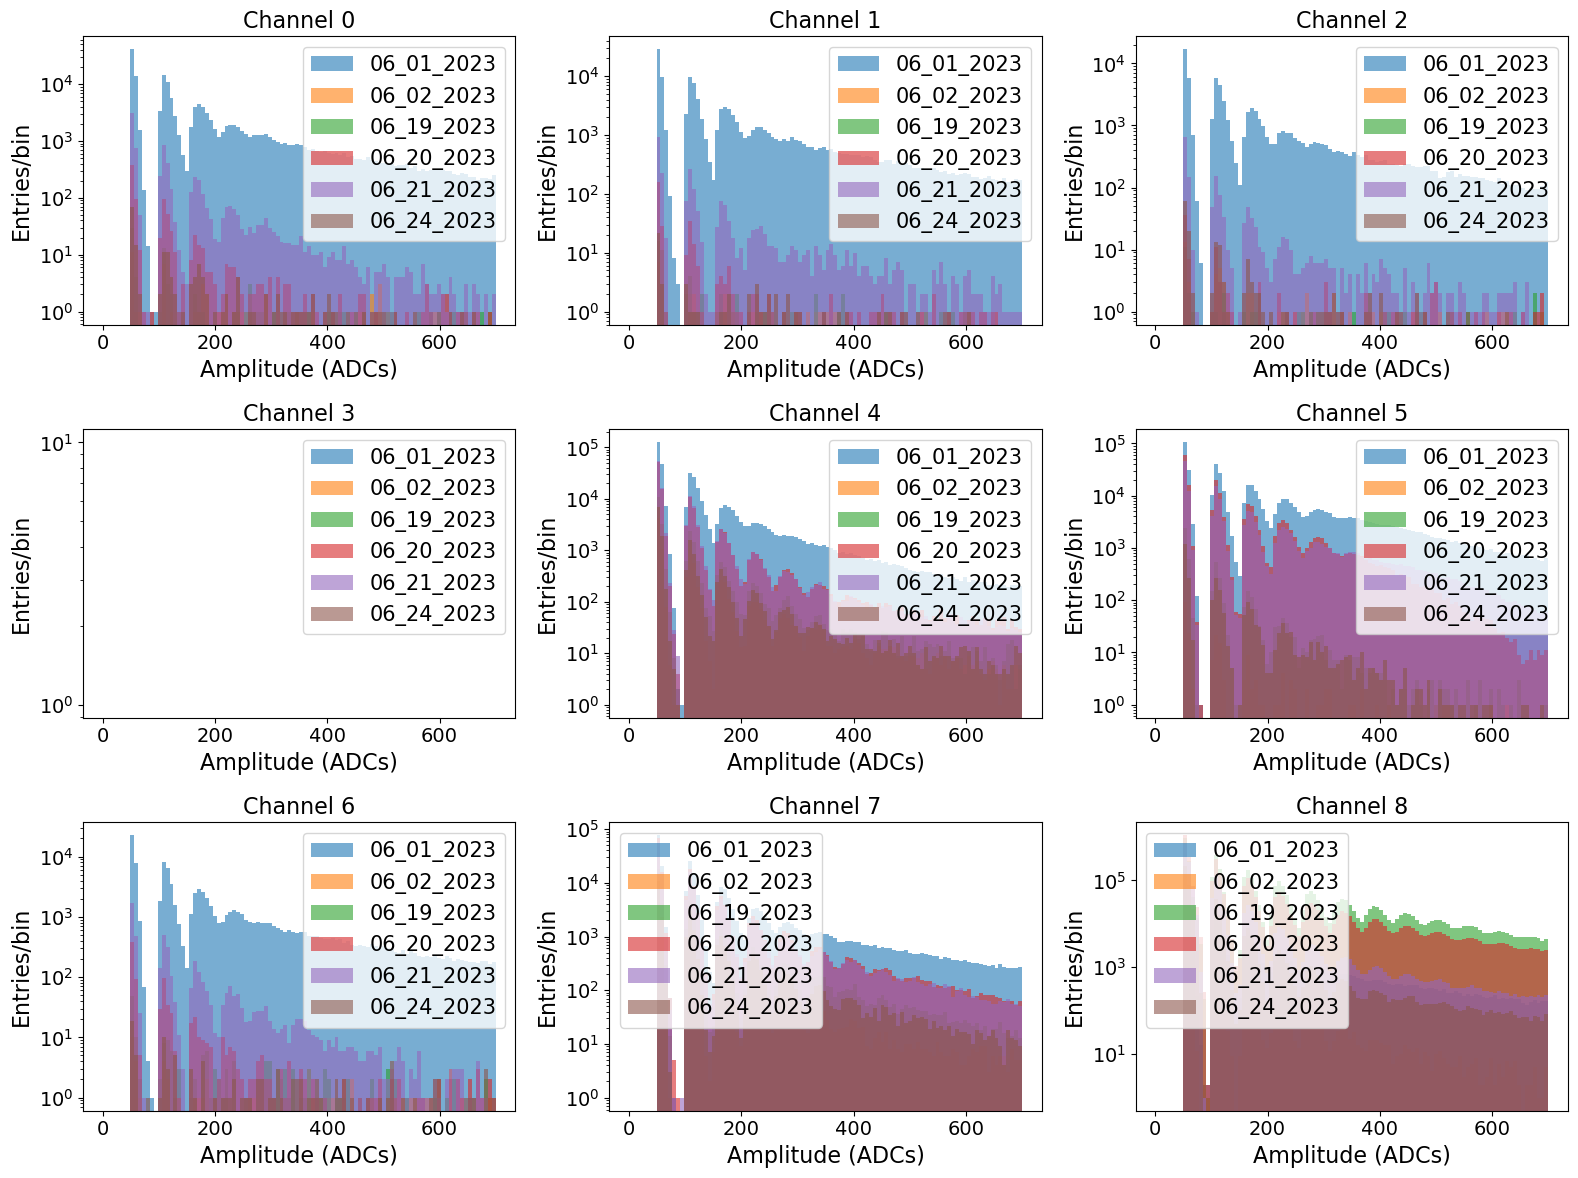

In [33]:
print('')
print('                      ---------------------------------------')
print('                      --- 0.1 ppm XENON (low light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,700), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,700), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,700), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date4][k], bins=100, range=(0,700), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date5][k], bins=100, range=(0,700), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date6][k], bins=100, range=(0,700), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.1 ppm XENON (high light levels) --
                      ---------------------------------------



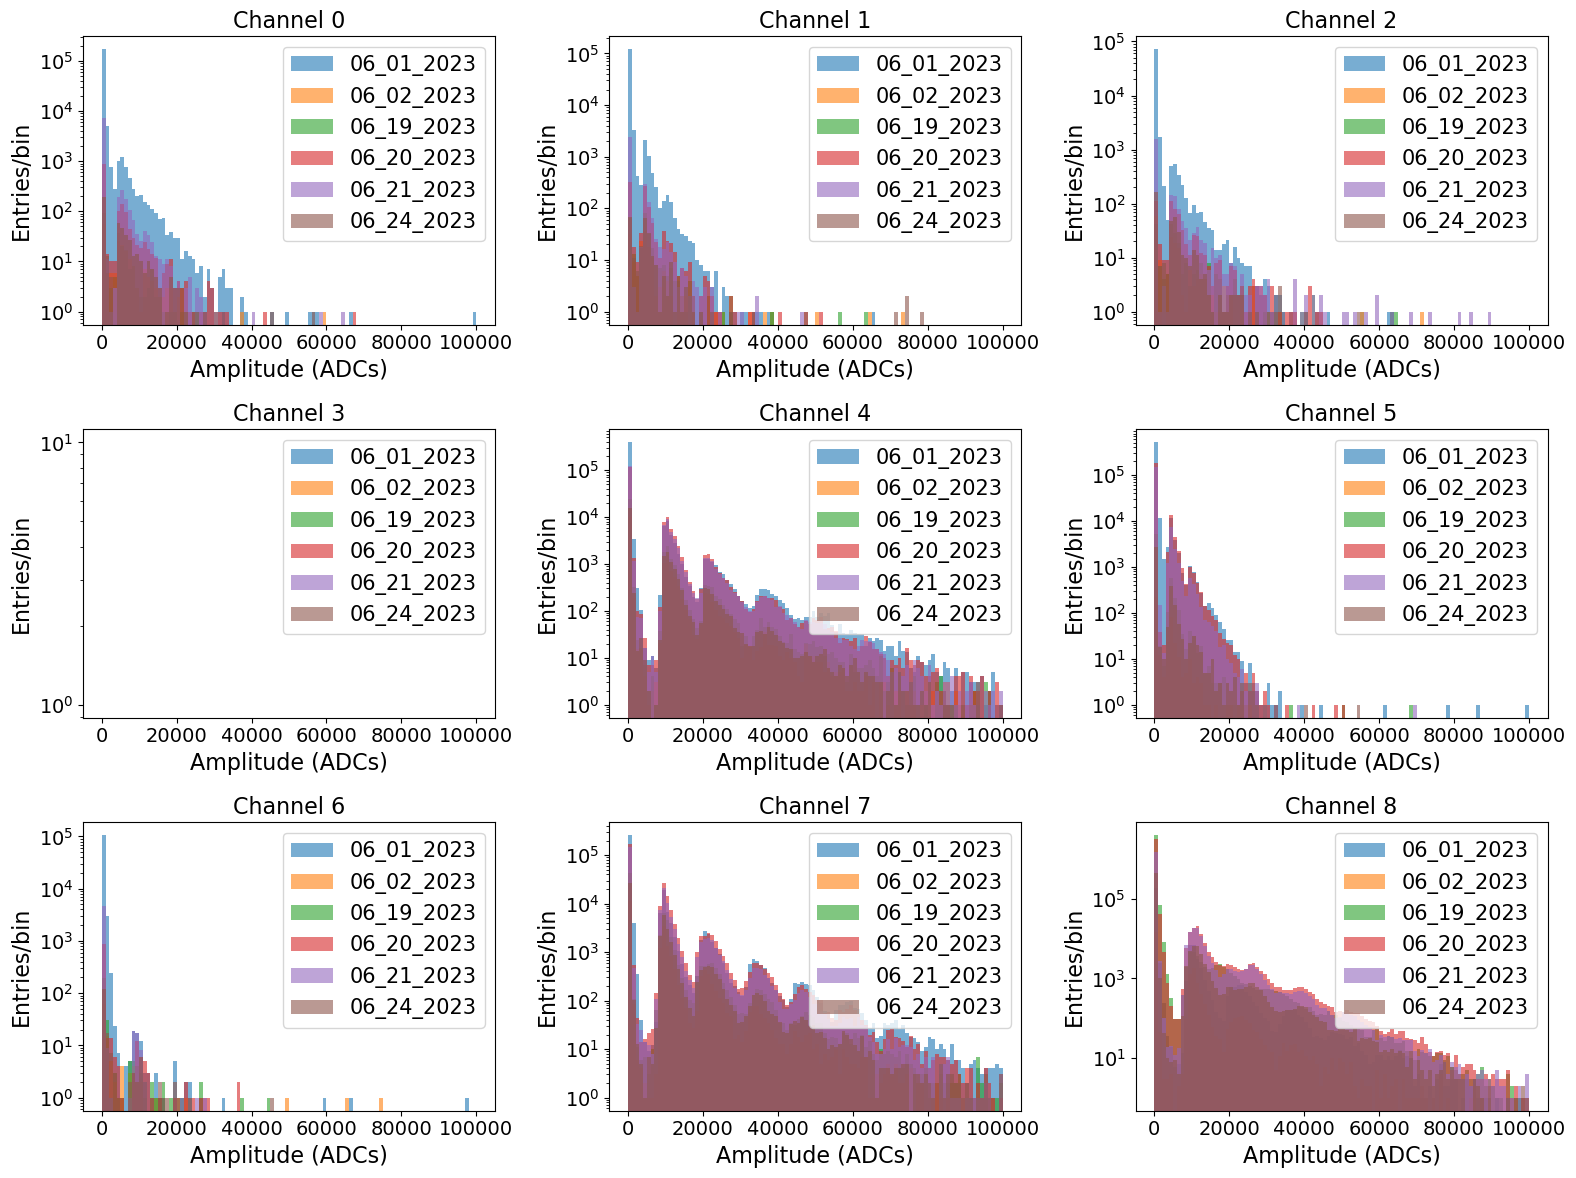

In [34]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.1 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '06_01_2023'
select_date2 = '06_02_2023'
select_date3 = '06_19_2023'
select_date4 = '06_20_2023'
select_date5 = '06_21_2023'
select_date6 = '06_24_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date4][k], bins=100, range=(0,100000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date5][k], bins=100, range=(0,100000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date6][k], bins=100, range=(0,100000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- 0.2 ppm XENON (low light levels) --
                      ---------------------------------------



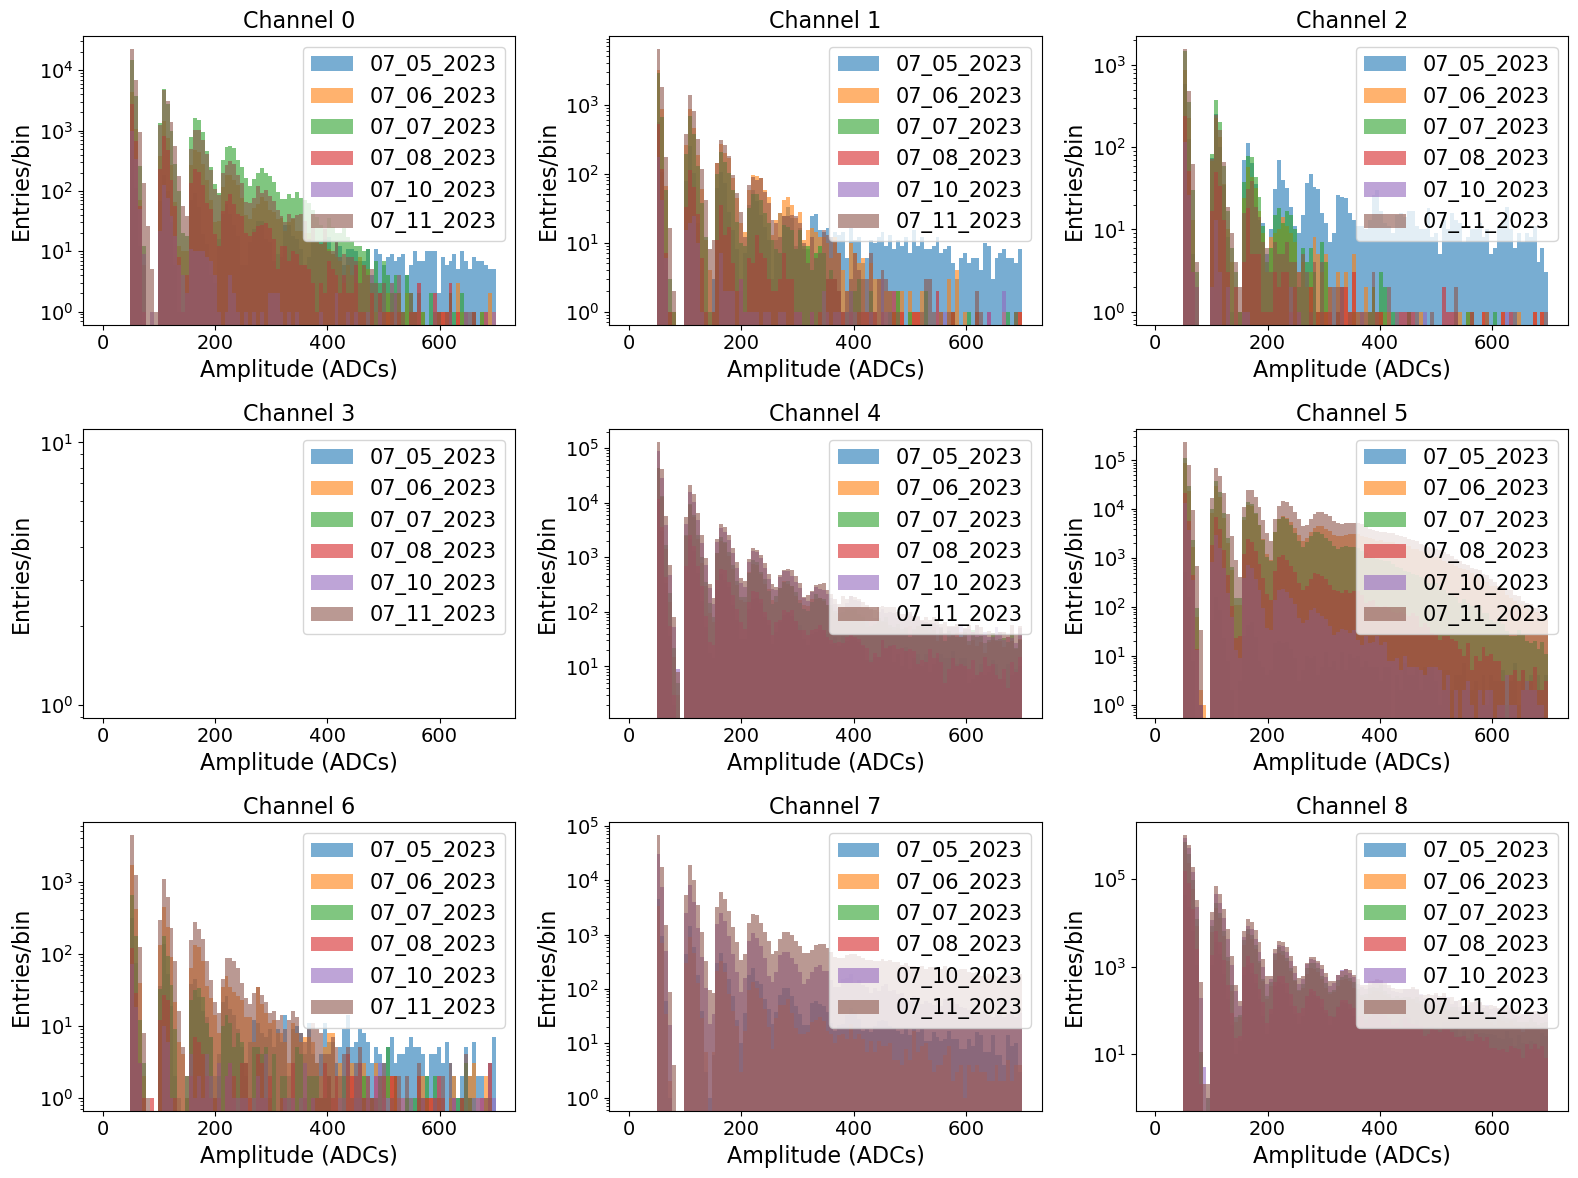

In [35]:
print('')
print('                      ---------------------------------------')
print('                      --- 0.2 ppm XENON (low light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,700), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,700), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,700), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date4][k], bins=100, range=(0,700), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date5][k], bins=100, range=(0,700), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date6][k], bins=100, range=(0,700), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- 0.2 ppm XENON (high light levels) --
                      ---------------------------------------



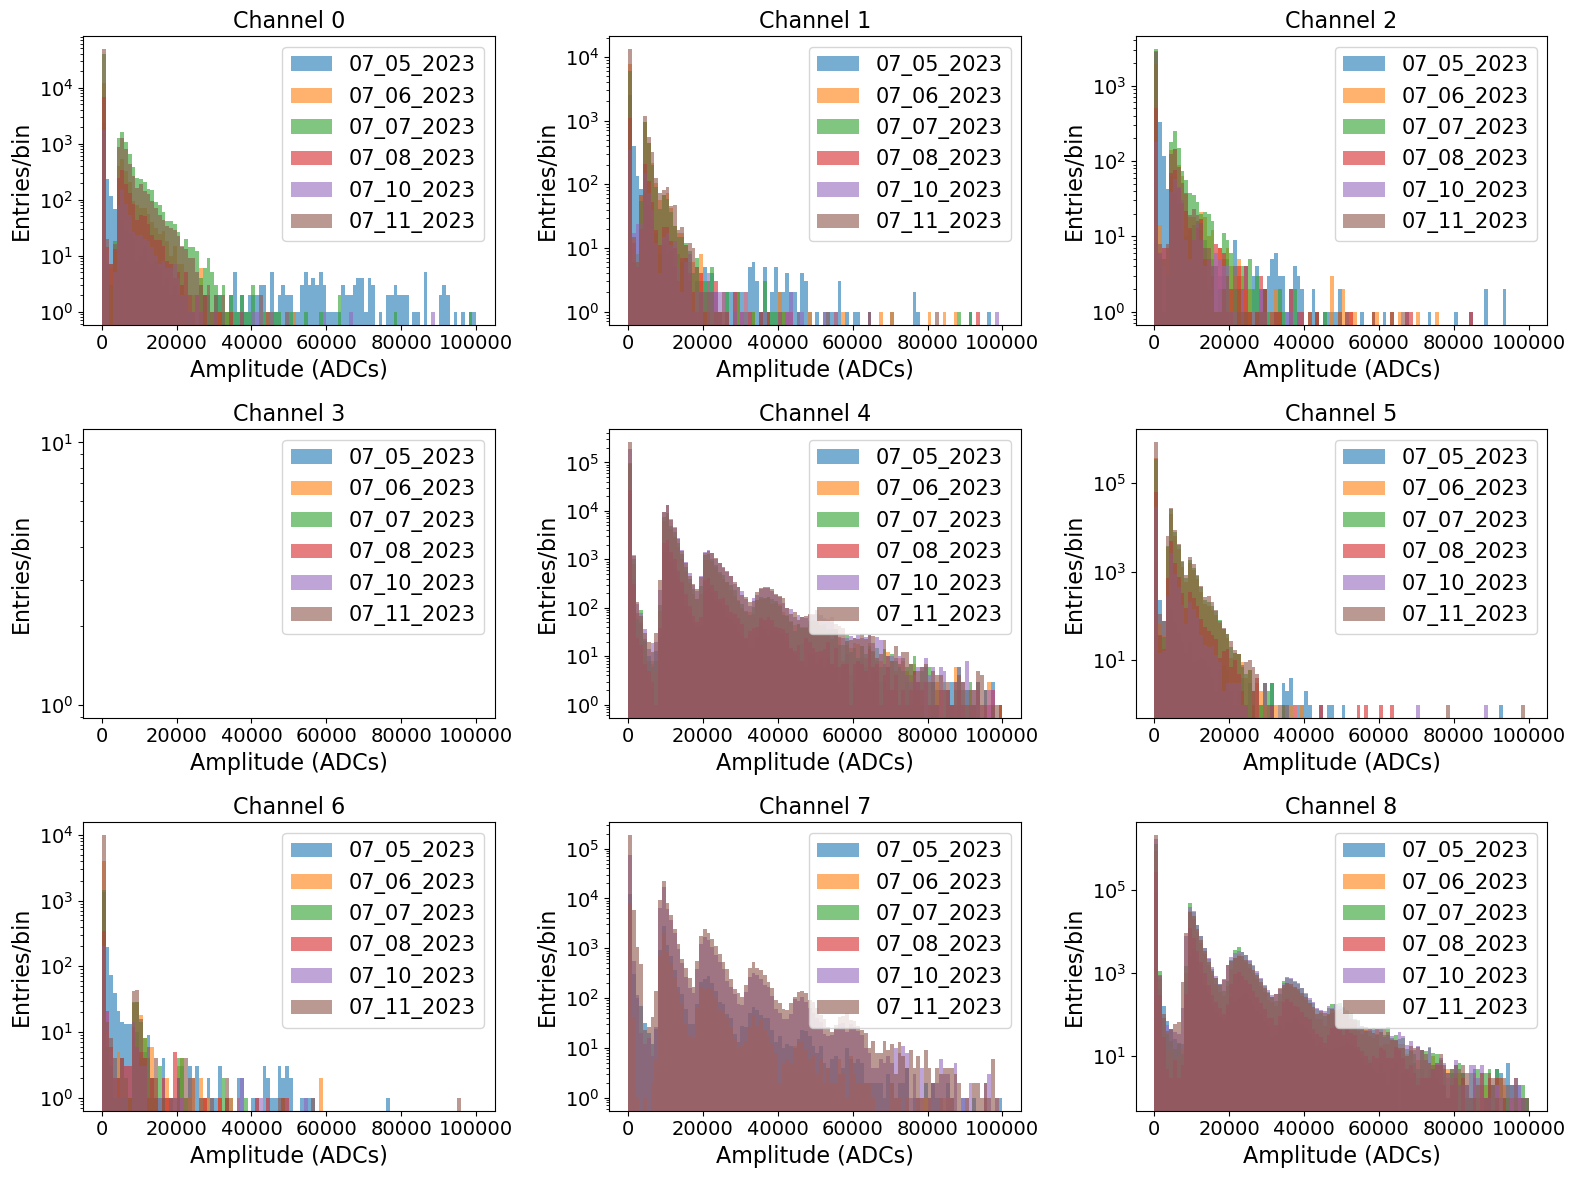

In [36]:
print('')
print('                      ---------------------------------------')
print('                      -- 0.2 ppm XENON (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '07_05_2023'
select_date2 = '07_06_2023'
select_date3 = '07_07_2023'
select_date4 = '07_08_2023'
select_date5 = '07_10_2023'
select_date6 = '07_11_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'{select_date1}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'{select_date2}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'{select_date3}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date4][k], bins=100, range=(0,100000), log=True, label=f'{select_date4}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date5][k], bins=100, range=(0,100000), log=True, label=f'{select_date5}', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date6][k], bins=100, range=(0,100000), log=True, label=f'{select_date6}', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()

## Compare the different amount of Xenon


                      ---------------------------------------
                      --- Peak integ ZS (low light levels) --
                      ---------------------------------------



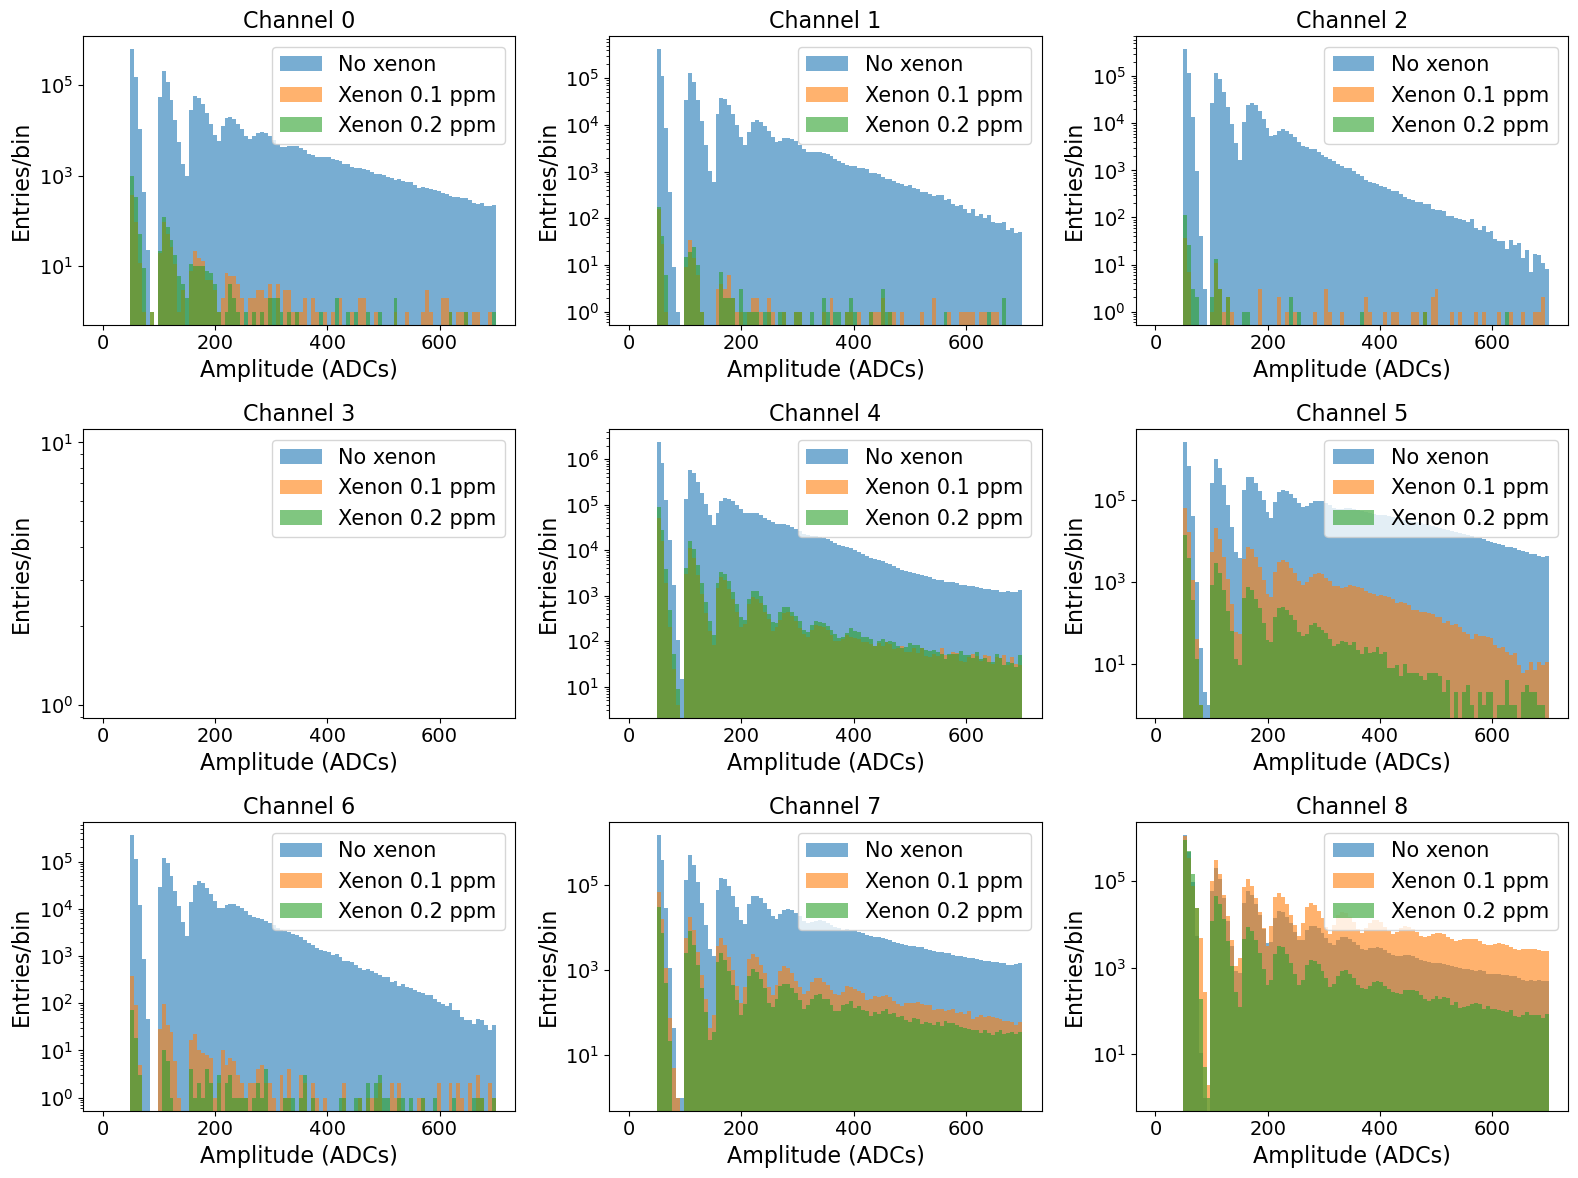

In [37]:
print('')
print('                      ---------------------------------------')
print('                      --- Peak integ ZS (low light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_10_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,700), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,700), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,700), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      -- Peak integ ZS (high light levels) --
                      ---------------------------------------



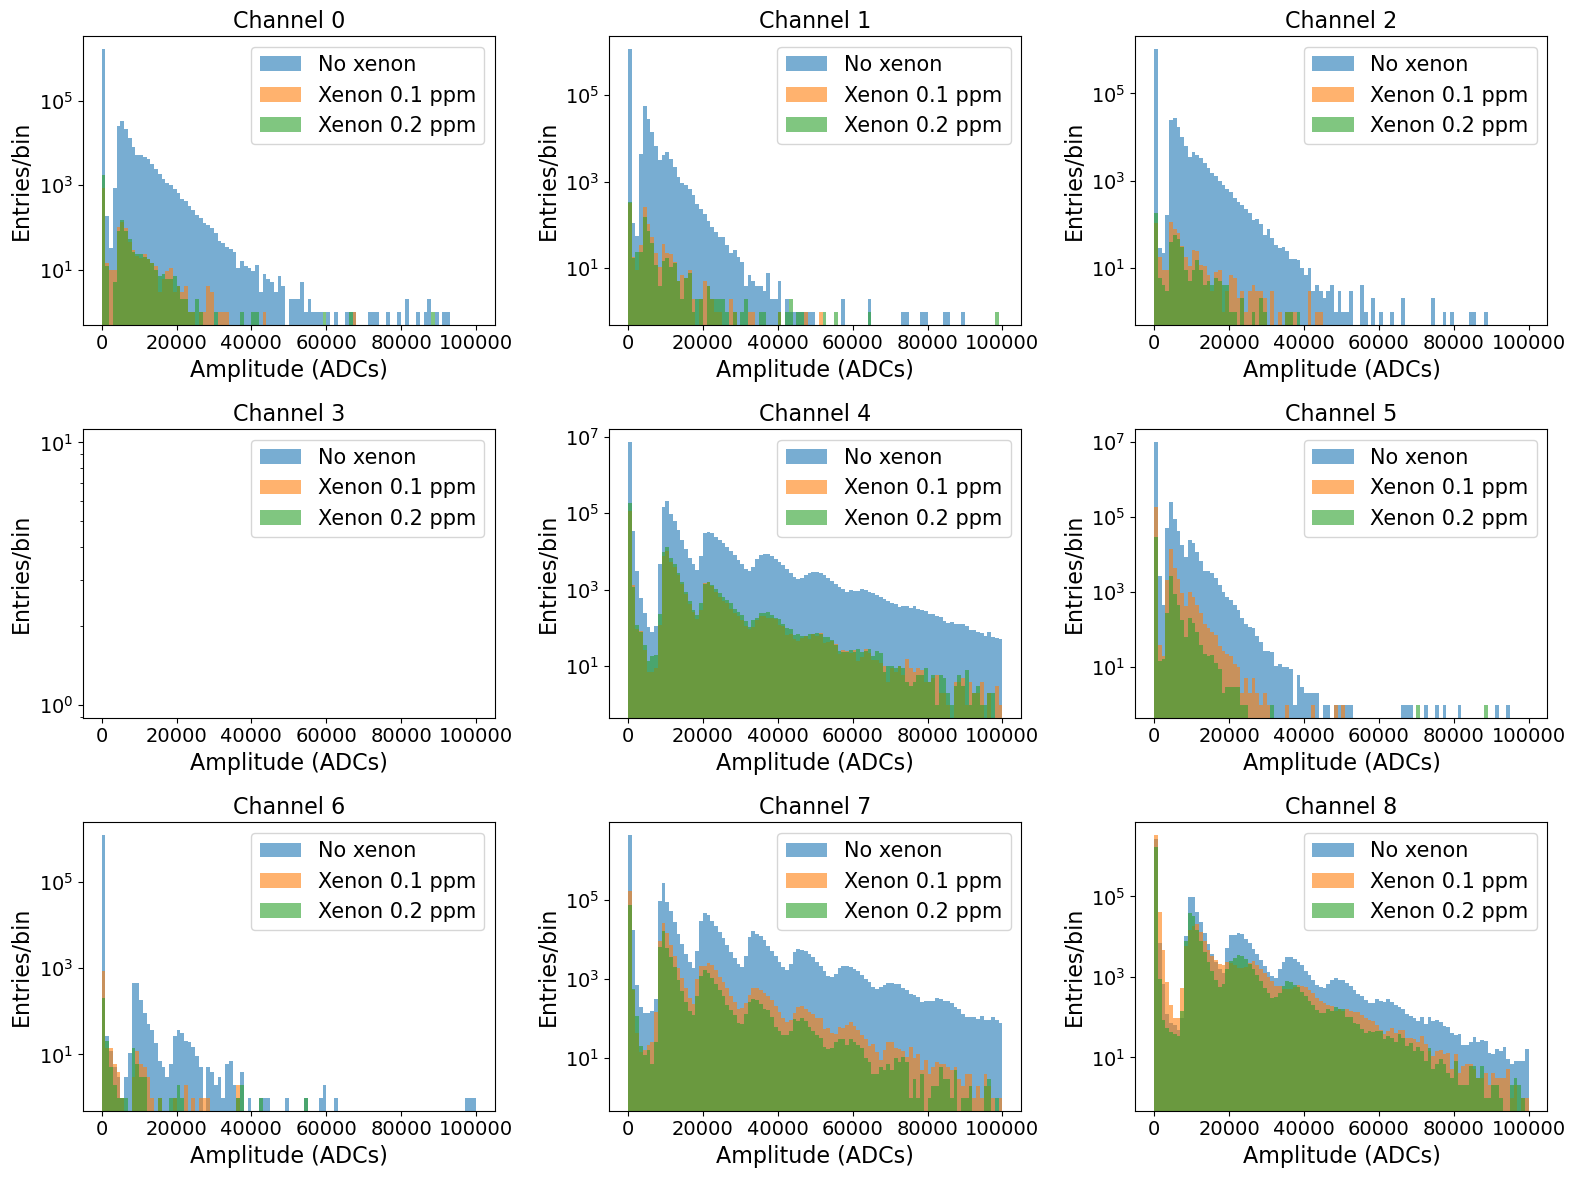

In [38]:
print('')
print('                      ---------------------------------------')
print('                      -- Peak integ ZS (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_10_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,100000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,100000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()


                      ---------------------------------------
                      --- Peak integ 1 (high light levels) --
                      ---------------------------------------



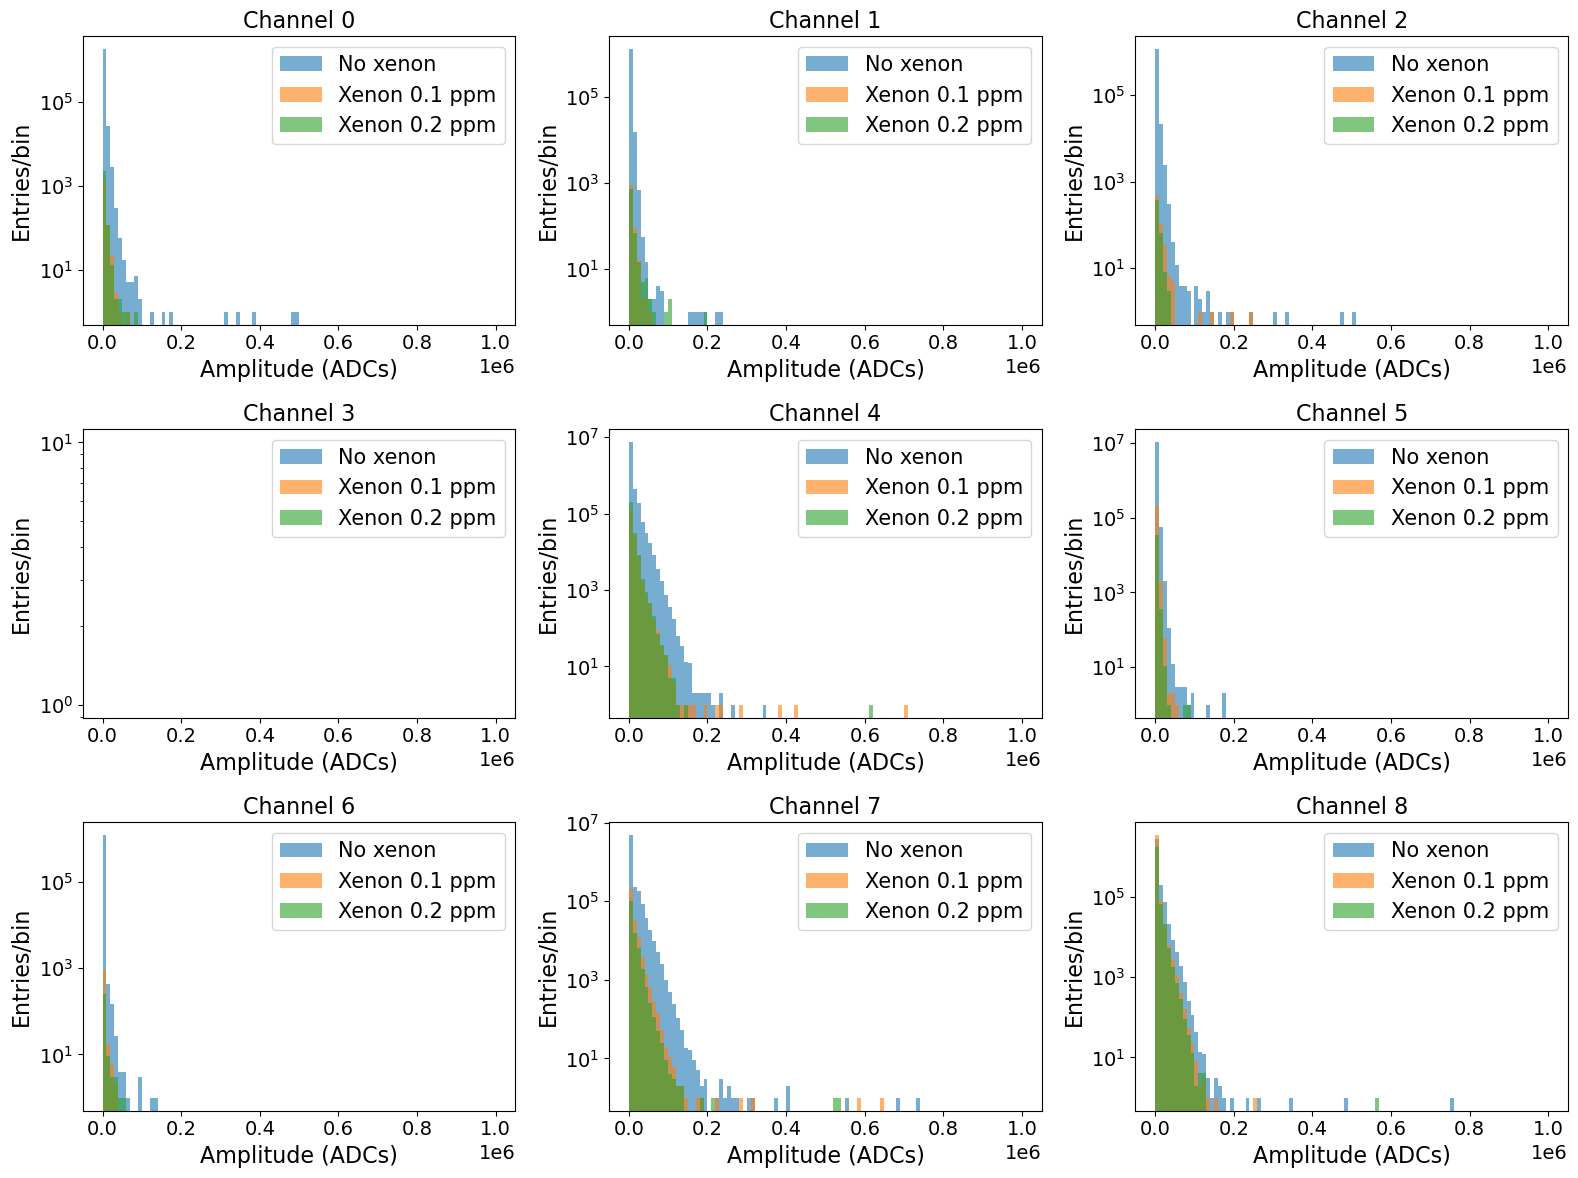

In [39]:
print('')
print('                      ---------------------------------------')
print('                      --- Peak integ 1 (high light levels) --')
print('                      ---------------------------------------')
print('')

select_date1 = '05_30_2023'
select_date2 = '06_20_2023'
select_date3 = '07_10_2023'

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in range(9):
    i = int(k/3)
    j = k%3
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date1][k], bins=100, range=(0,1000000), log=True, label=f'No xenon', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date2][k], bins=100, range=(0,1000000), log=True, label=f'Xenon 0.1 ppm', alpha=0.6)
    axs[i][j].hist(peak_area_zs_all_channels_dict[select_date3][k], bins=100, range=(0,1000000), log=True, label=f'Xenon 0.2 ppm', alpha=0.6)
    axs[i][j].set_xlabel('Amplitude (ADCs)', fontsize=16)
    axs[i][j].set_ylabel('Entries/bin',      fontsize=16)
    axs[i][j].set_title(f"Channel {k}",      fontsize=16)
    axs[i][j].legend(fontsize=15)
plt.tight_layout()
plt.show()